In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

pd.set_option('display.precision', 3)

In [2]:
df_train = pd.read_csv("train.csv")

df_train.head(10)

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   
5       489  வள்ளி | VALLI | Sun TV | Tamil Serial | Episod...   
6     18658     Just a Couple Friends - Acoustic (MUSIC VIDEO)   
7     59440    烈火如歌 | The Flame's Daughter 12（迪麗熱巴、周渝民、張彬彬等主演）   
8     47650                        趙薇黃有龍夫婦不服判決、反抗習大大、這陝西包子算老幾！   
9     87608  Tucker Carlson Tonight 12/15/17 - Tucker Carls...   

           channel_title  category_id publish_date  \
0                 HUM TV         24.0   2017-12-12   
1  ABS-CBN Entertainment         24.0   2018-03-08   
2     SANDALWOOD REVIEWS         24.0   2018-03-26   
3            doddleoddle         10.0   2018-02-21   
4         Dude Seriously         23.0   2018-05-10   
5       Saregama TVShows         24.0   2018-02-02   
6           Sugar Pine 7         24.0   2018-01-24   
7                   大劇獨播          1.0   2018-03-08   
8                   中國現在         25.0   2017-11-16   
9            Dennis Boyd         22.0   2017-12-16   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726.0     847.0   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311.0      69.0   
5  Valli|"Sunil"|"Tamil TV shows"|"kollywood acto...   88172.0      86.0   
6  sugar pine 7|"just a couple friends"|"acoustic...  110599.0     161.0   
7  電視劇|"大陸電視劇"|"烈火如歌"|"三生三世十里桃花"|"周渝民"|"迪丽热巴"|"张彬...   69094.0      17.0   
8              leisure|"travel"|"health"|"knowledge"   95497.0      46.0   
9                                             [none]   76843.0      68.0   

   comment_count                                        description  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3         4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...   
4          161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   
5           69.0  VALLI - WATCH TODAY EPISODE ::\n\nஆட்டோ டிரைவர...   
6          829.0  Acoustic version of the award winning song. Th...   
7          116.0  Thanks for watching the drama! Help more peopl...   
8           41.0                                 馬雲 肖建華 江澤民 江綿恆 習近平   
9          397.0               breaking news president donald trump   

  country_code    likes  
0           CA   2351.0  
1           CA   3264.0  
2           IN    580.0  
3           GB  82773.0  
4           IN   3557.0  
5           IN    743.0  
6           US  11161.0  
7           CA    196.0  
8           CA    124.0  
9           CA    661.0

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [4]:
df_test = pd.read_csv("test.csv")

df_test.head(10)

video_id                                              title  \
0     87185  జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...   
1      9431  ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...   
2     40599                           Thank you, Rider Nation!   
3       494  Measuring RPM with a spectrum analyzer mobile app   
4     73942  Anchor Anasuya responded on Phone breaking iss...   
5      6918                                  TactiCOOL RELOADS   
6     28520  Taiwan High Speed Train BUSINESS Class Taipei ...   
7     37462  Joe: President Donald Trump Knows Another Shoo...   
8     37920           The Unbelievable Landlord | Being Indian   
9     41158    Why Don't We - Trust Fund Baby (Official Audio)   

              channel_title  category_id publish_date  \
0     CHIRRAVURI FOUNDATION         22.0   2018-01-17   
1           VIRAL IN  INDIA         22.0   2017-11-18   
2  Saskatchewan Roughriders         17.0   2017-12-01   
3           Matthias Wandel         26.0   2018-02-06   
4     AVA Creative thoughts         22.0   2018-02-06   
5                  Corridor         24.0   2018-06-13   
6                Mikey Chen         22.0   2017-11-13   
7                     MSNBC         25.0   2018-02-16   
8               BeingIndian         23.0   2017-12-09   
9          Atlantic Records         10.0   2018-02-01   

                                                tags     views  dislikes  \
0  Chirravuri|"Foundation"|"chirravuri foundation...   80793.0      54.0   
1  Raj Thackeray|"LIVE SPEECH"|"latest Speech"|"r...  150317.0     230.0   
2  Roughriders|"Riders"|"CFL"|"Regina"|"Saskatche...    6558.0      10.0   
3  rpm|"woodworking"|"tool speed"|"blade speed"|"...   89664.0     145.0   
4  anasuya responded|"anasuya issue"|"anasuya bor...   53526.0     357.0   
5  matrix|"action"|"action comedy"|"funny"|"best ...  345911.0     230.0   
6  taiwan travel|"taiwan travels"|"traveling in t...  116719.0      75.0   
7  Morning Joe|"Joe Scarborough"|"Mika Brzezinski...  145451.0     144.0   
8  funny|"funny videos"|"comedy"|"beingindian"|"b...   29700.0     201.0   
9  music|"official"|"music video"|"atlantic"|"rec...  206339.0     331.0   

   comment_count                                        description  \
0           79.0  8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...   
1          311.0  Don't Forget to SUBSCIRBE to our YouTube Chann...   
2            7.0  “To the devoted, the impassioned, the loyal:\n...   
3          324.0  Using a spectrum analyzer app to analyze the s...   
4          153.0  Welcome to AVA Creative thoughts Channel Subsc...   
5         2084.0  Thank you to Freddie for collabing with us! Ch...   
6          369.0  ❖Support us by getting our new shirts! http://...   
7         1458.0  Joe Scarborough and the Morning Joe panel wond...   
8          103.0  SUBSCRIBE to Being Indian Channel by CLICKING ...   
9         2951.0  'Trust Fund Baby' Out Now:\nhttps://Atlantic.l...   

  country_code  
0           IN  
1           IN  
2           CA  
3           US  
4           IN  
5           CA  
6           CA  
7           CA  
8           IN  
9           US

In [5]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11170 entries, 0 to 11169
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       11170 non-null  int64  
 1   title          11170 non-null  object 
 2   channel_title  11170 non-null  object 
 3   category_id    11170 non-null  float64
 4   publish_date   11170 non-null  object 
 5   tags           11170 non-null  object 
 6   views          11170 non-null  float64
 7   dislikes       11170 non-null  float64
 8   comment_count  11170 non-null  float64
 9   description    11170 non-null  object 
 10  country_code   11170 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 960.0+ KB


In [6]:

print(df_train['category_id'].nunique())
df_train['category_id'].value_counts()

17


24.0    9614
25.0    3725
22.0    2365
10.0    2099
23.0    1736
17.0    1421
26.0    1263
1.0      999
27.0     966
28.0     637
20.0     554
2.0      217
15.0     185
19.0     148
29.0      87
43.0      44
30.0       1
Name: category_id, dtype: int64

In [7]:
df_train.shape

(26061, 12)

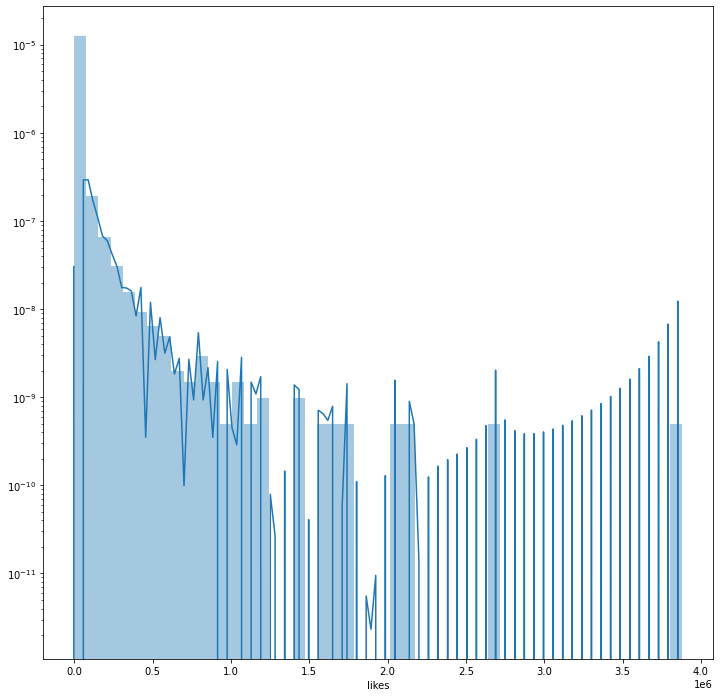

In [8]:
# Distribution of the likes data in log scale
plt.figure(figsize = (12,12))
sns.distplot(df_train['likes'])
plt.yscale('log')

plt.show()

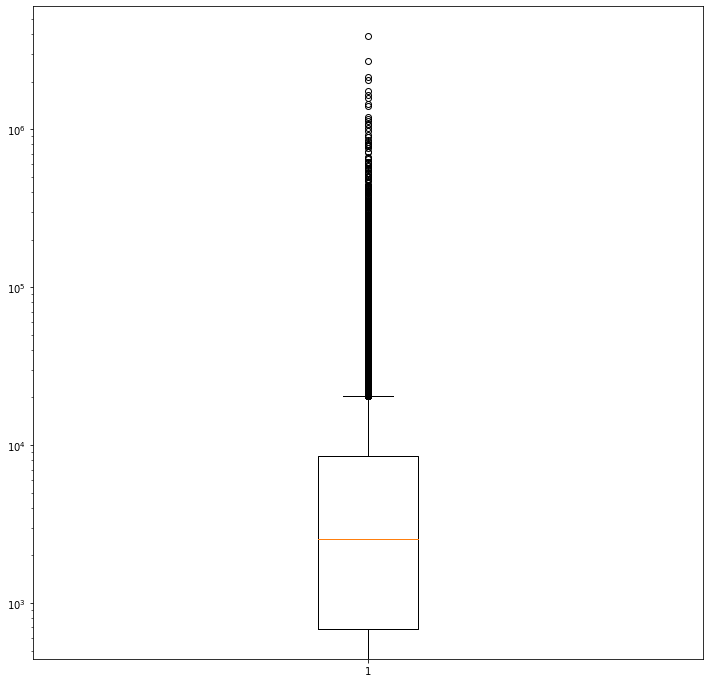

In [9]:
# Boxplot of number of likes in the log scale
plt.figure(figsize = (12,12))

plt.boxplot(df_train['likes'])
plt.yscale("log")

plt.show()

In [7]:
#Summary statistics of the number of likes
df_train.likes.describe()

count    2.606e+04
mean     1.258e+04
std      5.856e+04
min      0.000e+00
25%      6.830e+02
50%      2.541e+03
75%      8.553e+03
max      3.880e+06
Name: likes, dtype: float64

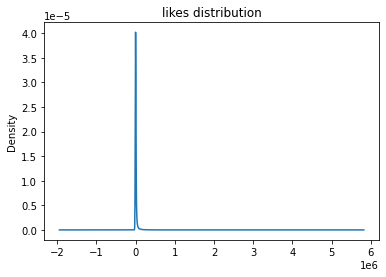

In [11]:
# Density plot of the number of likes in the linear scale
df_train.likes.plot(kind = 'density', title = 'likes distribution')

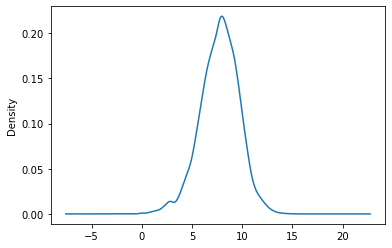

In [12]:
#Density plot of the number of likes converted to natural log + 1 format
np.log1p(df_train['likes']).plot(kind = 'density')
plt.show()

In [13]:
df_train['likes'].describe()

count    2.606e+04
mean     1.258e+04
std      5.856e+04
min      0.000e+00
25%      6.830e+02
50%      2.541e+03
75%      8.553e+03
max      3.880e+06
Name: likes, dtype: float64

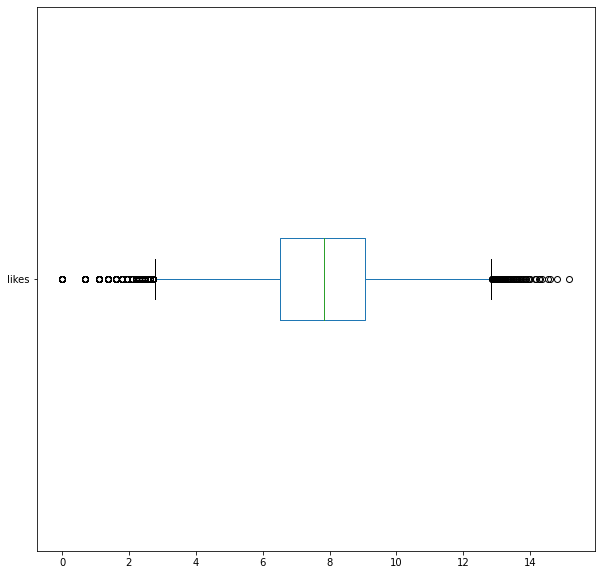

In [14]:
# Boxplot of the number of likes converted to natural log + 1 format
np.log1p(df_train.likes).plot(kind = 'box', vert = False, figsize = (10,10))

In [15]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       26061 non-null  int64  
 1   title          26061 non-null  object 
 2   channel_title  26061 non-null  object 
 3   category_id    26061 non-null  float64
 4   publish_date   26061 non-null  object 
 5   tags           26061 non-null  object 
 6   views          26061 non-null  float64
 7   dislikes       26061 non-null  float64
 8   comment_count  26061 non-null  float64
 9   description    26061 non-null  object 
 10  country_code   26061 non-null  object 
 11  likes          26061 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [16]:
#Converting data types
int_vars = ['views', 'dislikes', 'likes', 'comment_count', 'category_id']
df_train[int_vars] = df_train[int_vars].astype('int64')
df_train[['description', 'tags', 'title', 'channel_title']] = df_train[['description', 'tags', 'title', 'channel_title']].astype('str')

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       26061 non-null  int64 
 1   title          26061 non-null  object
 2   channel_title  26061 non-null  object
 3   category_id    26061 non-null  int64 
 4   publish_date   26061 non-null  object
 5   tags           26061 non-null  object
 6   views          26061 non-null  int64 
 7   dislikes       26061 non-null  int64 
 8   comment_count  26061 non-null  int64 
 9   description    26061 non-null  object
 10  country_code   26061 non-null  object
 11  likes          26061 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 2.4+ MB


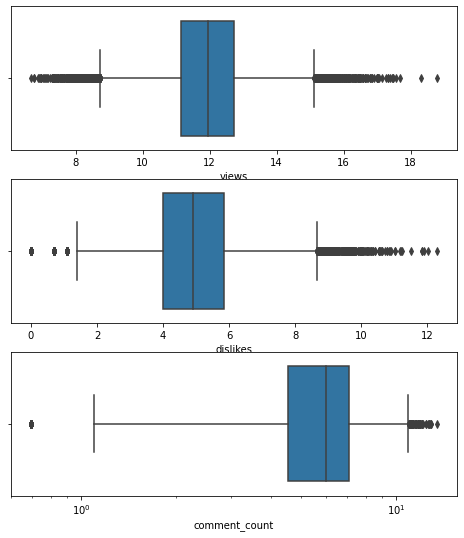

In [17]:
# Boxplots of numerical variables in the log1p format
num_cols = ['views', 'dislikes', 'comment_count']

fig, axes = plt.subplots(3,1, figsize = (8,9))
for i,c in enumerate(num_cols): 
    _ = sns.boxplot(np.log1p(df_train[c]), ax = axes[i])
    _ = plt.xscale('log')

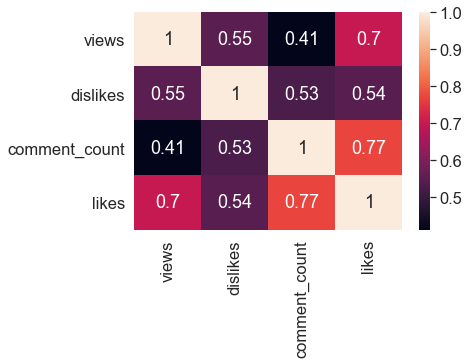

In [18]:
sns.set(font_scale = 1.5)
sns.heatmap(df_train[num_cols + ['likes']].corr(), annot = True)

In [19]:
df_train[num_cols + ['likes']].describe()

views    dislikes  comment_count      likes
count  2.606e+04   26061.000      26061.000  2.606e+04
mean   3.876e+05     539.231       1693.146  1.258e+04
std    1.596e+06    3117.169       9247.594  5.856e+04
min    7.870e+02       0.000          0.000  0.000e+00
25%    6.860e+04      53.000         93.000  6.830e+02
50%    1.536e+05     134.000        389.000  2.541e+03
75%    3.380e+05     348.000       1211.000  8.553e+03
max    1.434e+08  217017.000     692312.000  3.880e+06

<Figure size 1296x1008 with 0 Axes>

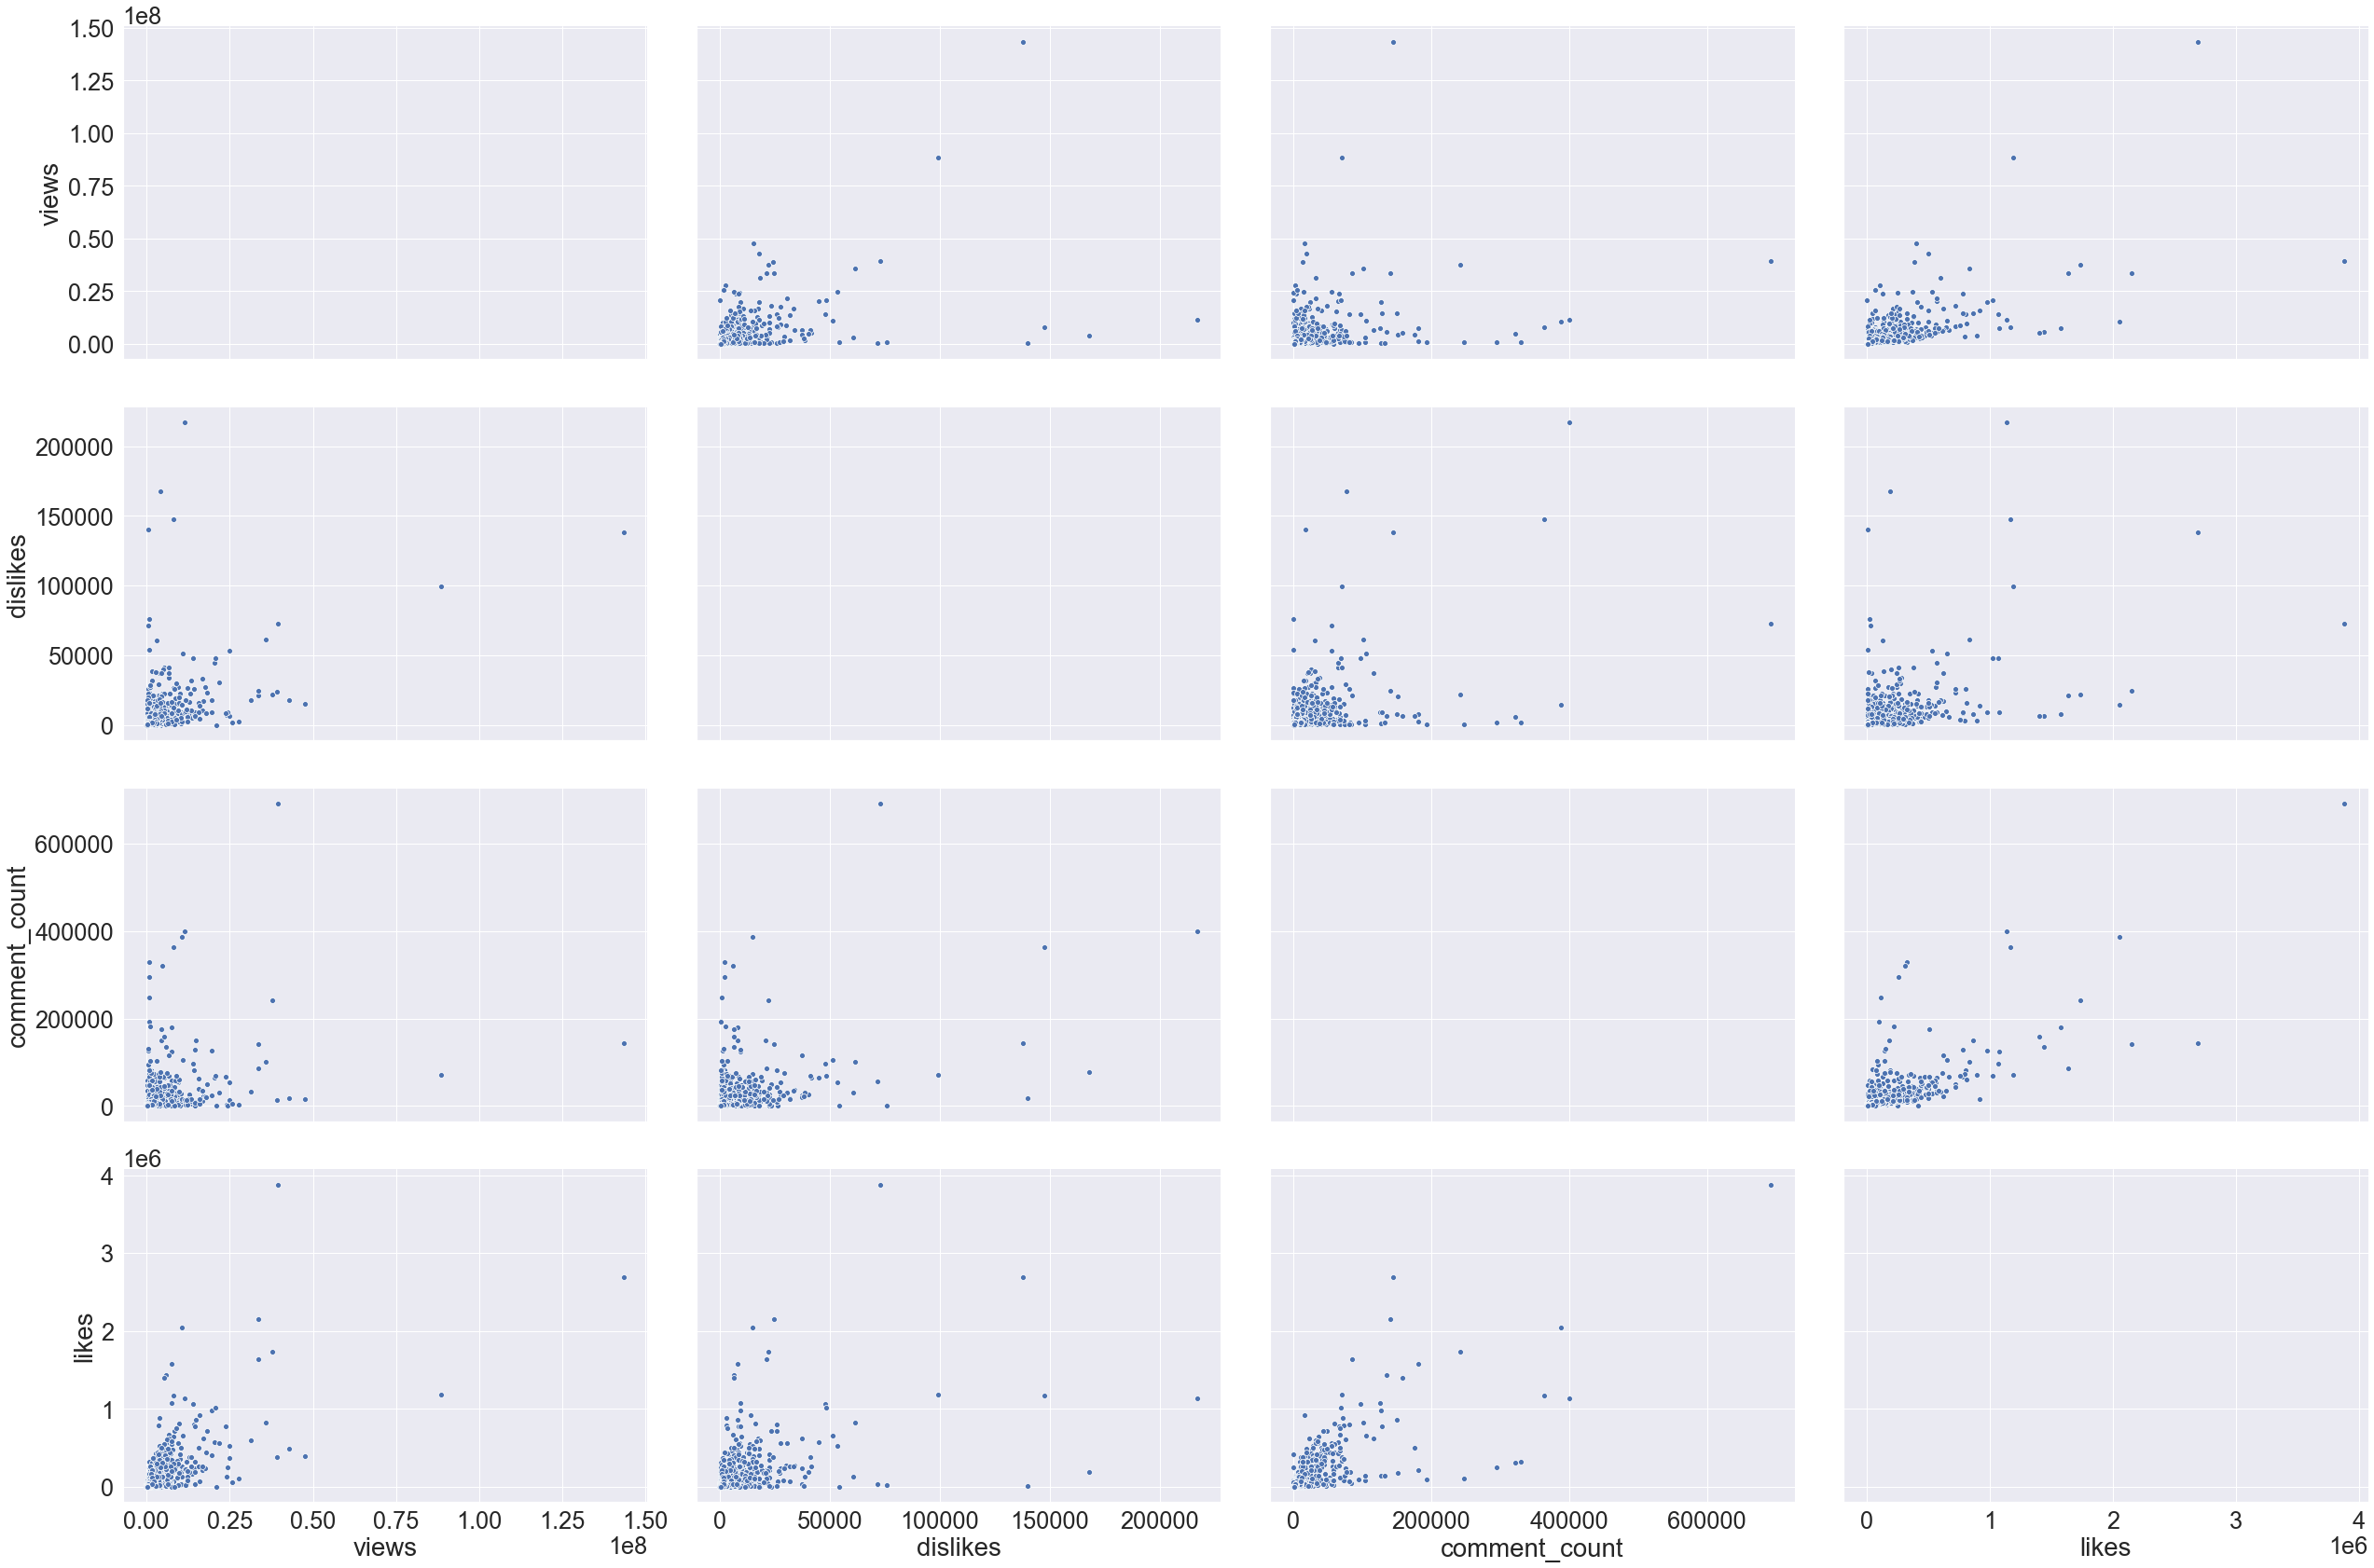

In [20]:
plt.figure(figsize = (18,14))
sns.set(font_scale = 2.3)
sns.pairplot(df_train[num_cols + ['likes']], height = 6, aspect = 24/16, diag_kind = 'reg')
plt.tight_layout()
plt.show()

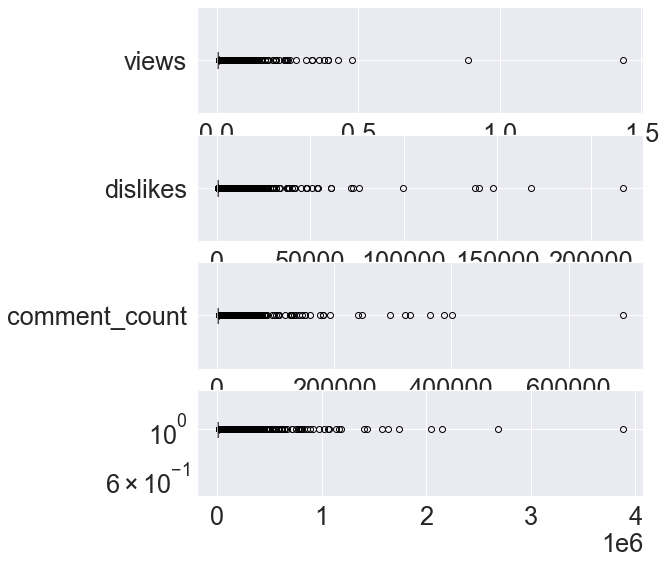

In [21]:
fig, axes = plt.subplots(4, 1, figsize=(8, 9))
for i, c in enumerate(num_cols + ['likes']):
  _ = df_train[[c]].boxplot(ax=axes[i], vert=False)

plt.yscale('log')

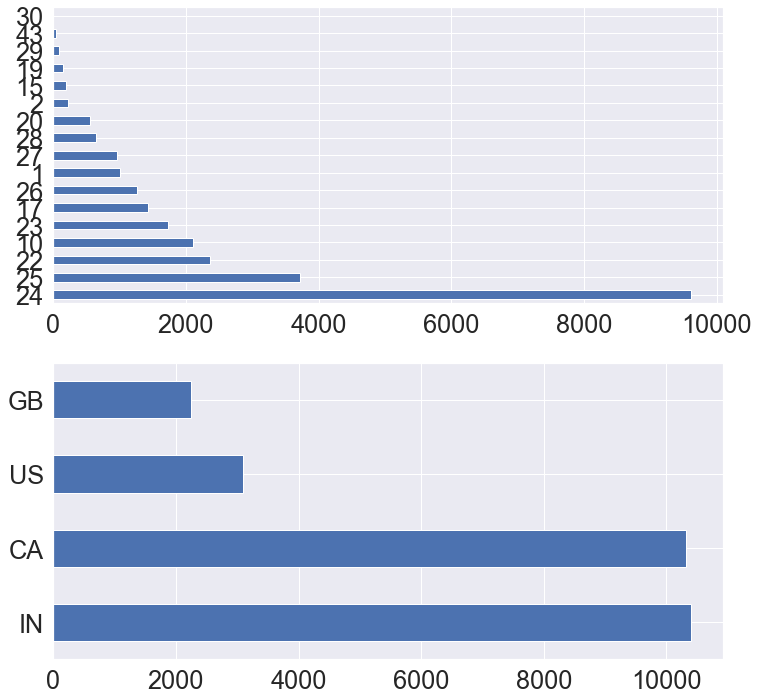

In [22]:
cat_cols = ['category_id', 'country_code']
fig,axes = plt.subplots(2,1, figsize = (12,12))

for i,c in enumerate(cat_cols): 
    df_train[c].value_counts().plot(kind = 'barh', ax = axes[i])
    
plt.show()

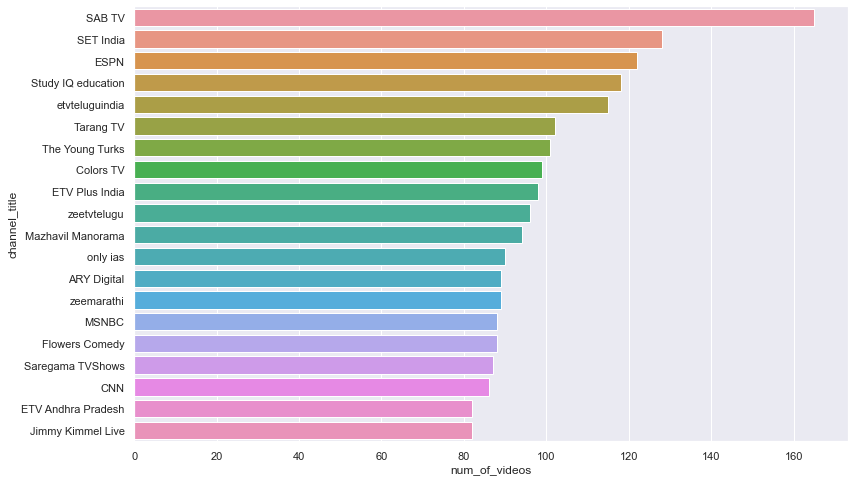

In [9]:
sns.set(rc = {'figure.figsize': (12.8, 8)})

top20_channels = df_train['channel_title'].value_counts(ascending = False)[:20].reset_index()
top20_channels.columns = ['channel_title', 'num_of_videos']

sns.barplot(data = top20_channels, y = 'channel_title', x = 'num_of_videos')

plt.show()

In [24]:
# Grouping data by country and channel title to find the top 12 channels by country and the number of videos uploaded by them
countrywise_channels = df_train.groupby(['country_code', 'channel_title']).size().sort_values().reset_index()
countrywise_channels.columns = ['country_code', 'channel_title', 'no_of_videos']

countrywise_channels = countrywise_channels.sort_values(by = ['no_of_videos'], ascending = False)

In [25]:
countrywise_channels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6675 entries, 6674 to 3337
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country_code   6675 non-null   object
 1   channel_title  6675 non-null   object
 2   no_of_videos   6675 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 208.6+ KB


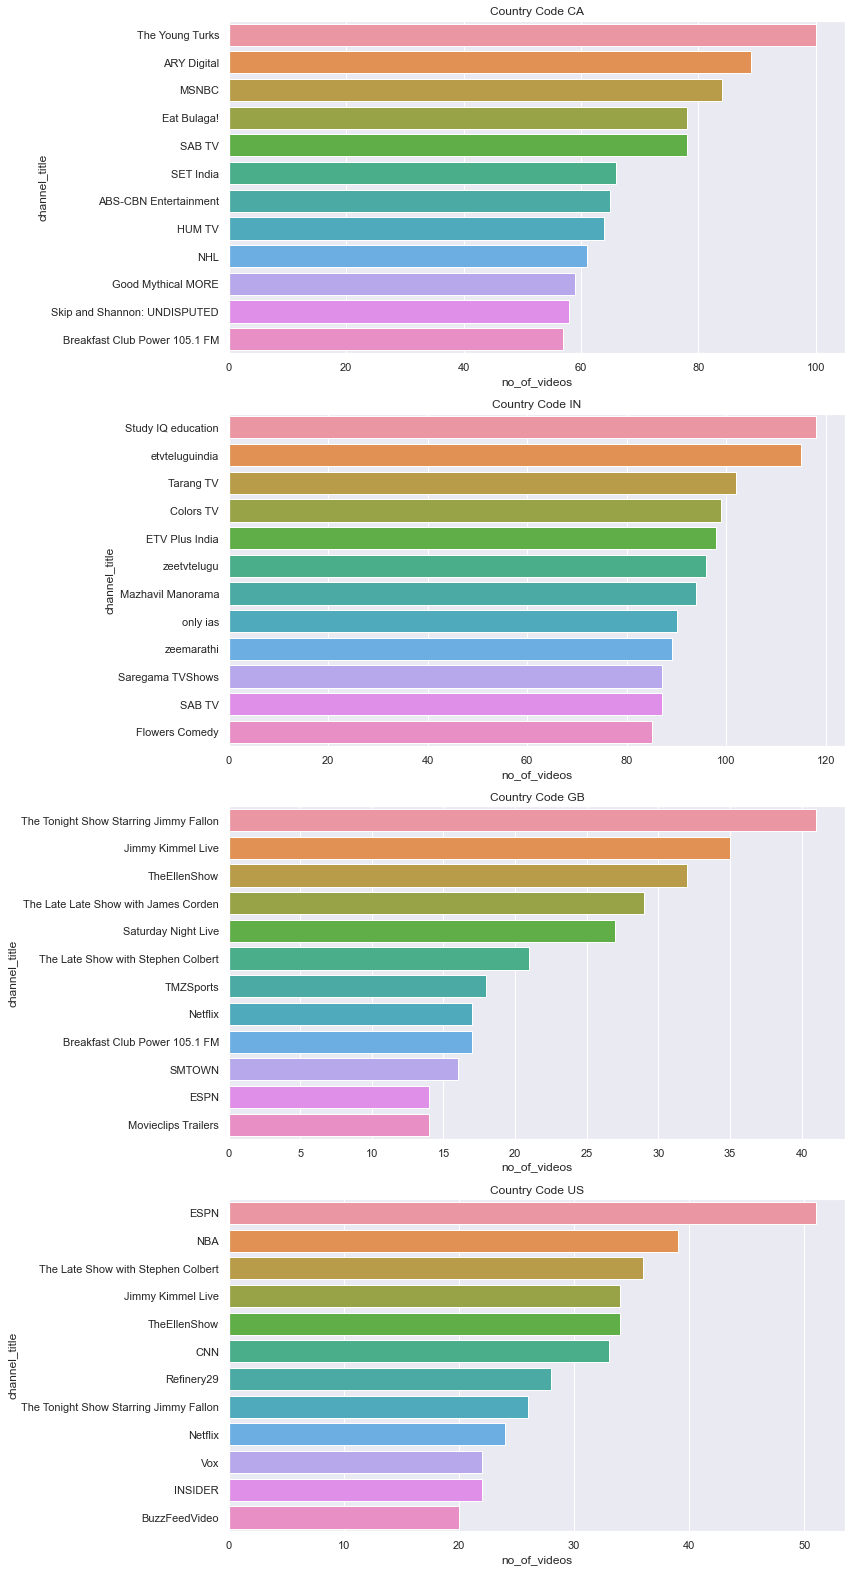

In [26]:
# Plotting channel and number of videos country wise
fig,ax = plt.subplots(4,1, figsize = (12,22))

for i,c in enumerate(df_train['country_code'].unique()): 
    country_channels = countrywise_channels[countrywise_channels['country_code'] == c][:12]
    _ = sns.barplot(x = country_channels['no_of_videos'], y = country_channels['channel_title'],  ax = ax[i])
    _ = ax[i].set_title(f'Country Code {c}')
    
plt.tight_layout()

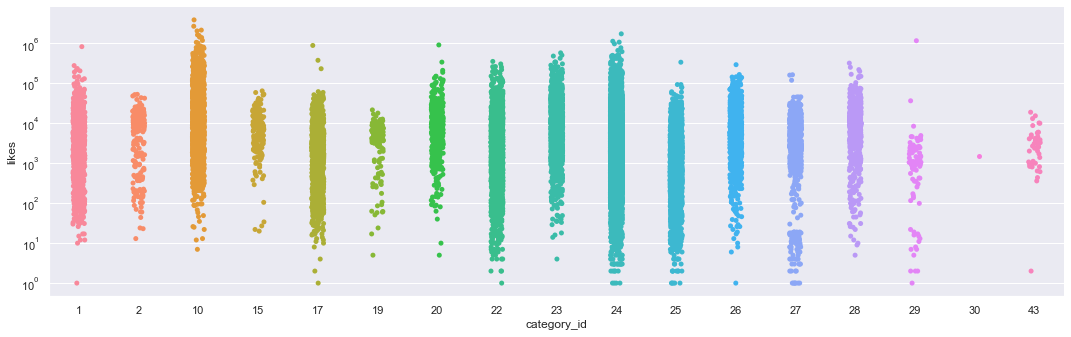

In [27]:
#Distribution of each category of videos across a log scale
sns.catplot(x = 'category_id', y = 'likes', data = df_train, height = 5, aspect = 24/8)

plt.yscale("log")

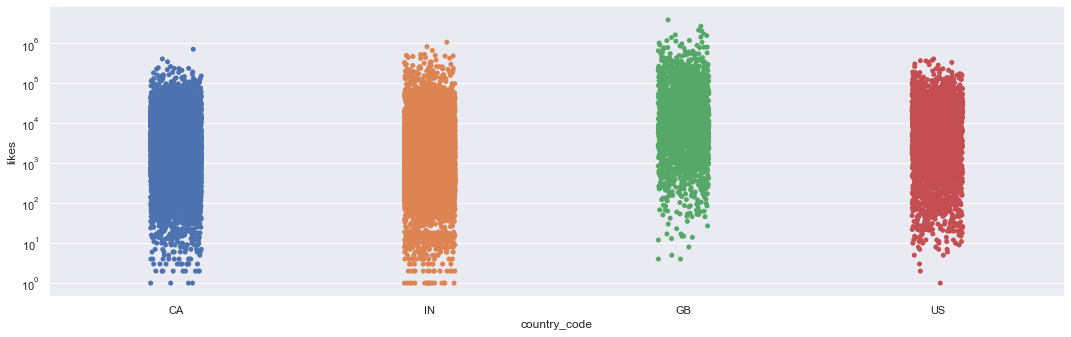

In [28]:
#Distribution of number of likes across each country
sns.catplot(x = 'country_code', y= 'likes', data = df_train, height = 5, aspect= 24/8)

plt.yscale('log')

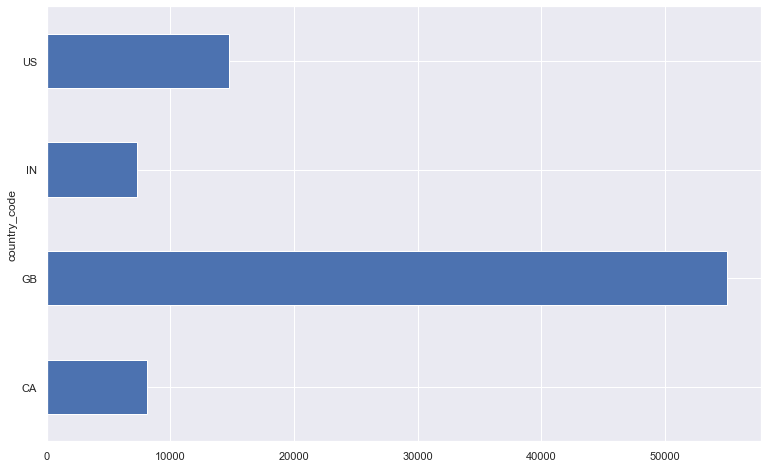

In [29]:
#Average number of likes per country
likes_by_country = df_train.groupby(['country_code'])['likes'].mean().plot(kind = 'barh')



In [30]:
df_train.head()

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title  category_id publish_date  \
0                 HUM TV           24   2017-12-12   
1  ABS-CBN Entertainment           24   2018-03-08   
2     SANDALWOOD REVIEWS           24   2018-03-26   
3            doddleoddle           10   2018-02-21   
4         Dude Seriously           23   2018-05-10   

                                                tags   views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430       298   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508        74   
2  challenging star darshan latest news|"challeng...   40205       150   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726       847   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311        69   

   comment_count                                        description  \
0            900  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1            314  Vice Ganda notices Bela Padilla's sudden chang...   
2            100  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3           4536  Hi hi hi! here's our vid on FLASHBACK's channe...   
4            161  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   

  country_code  likes  
0           CA   2351  
1           CA   3264  
2           IN    580  
3           GB  82773  
4           IN   3557

In [31]:
# Converting published date to a datetime object
df_train['publish_date'] = pd.to_datetime(df_train['publish_date'], format = "%Y-%m-%d")
df_test['publish_date'] = pd.to_datetime(df_test['publish_date'], format = "%Y-%m-%d")

In [32]:
print(max(df_train['publish_date']))
print(min(df_train['publish_date']))
print(max(df_train['publish_date']) - min(df_train['publish_date']))

2018-06-14 00:00:00
2006-07-23 00:00:00
4344 days 00:00:00


In [33]:
df_train['publish_date'].dt.year.value_counts()


2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

Text(0.5, 1.0, 'Number of videos posted after November 17')

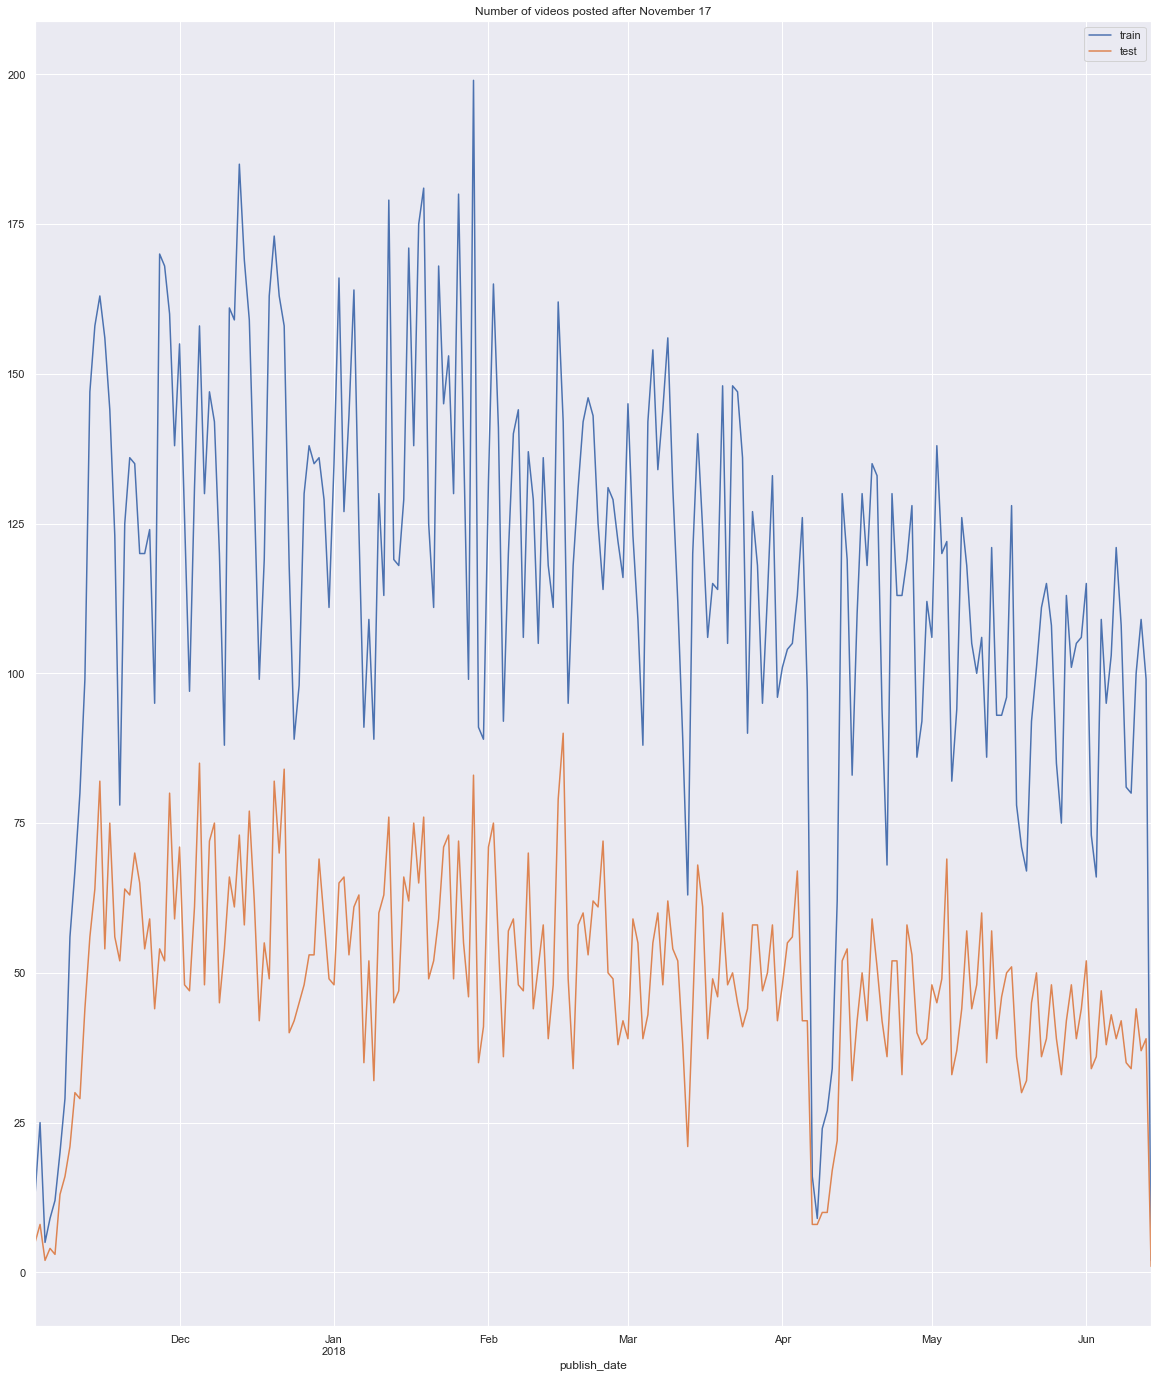

In [34]:
#Plotting the number of videos uploaded in each month
latest_date_train = df_train[df_train['publish_date'] > '2017-11']
latest_date_test = df_test[df_test['publish_date'] > '2017-11']

latest_date_train.sort_values(by = 'publish_date').groupby(['publish_date']).size().plot(figsize = (20,24), label = 'train')
latest_date_test.sort_values(by = 'publish_date').groupby(['publish_date']).size().plot(figsize = (20,24), label = 'test')
plt.legend(loc = 'upper right')
plt.title("Number of videos posted after November 17")


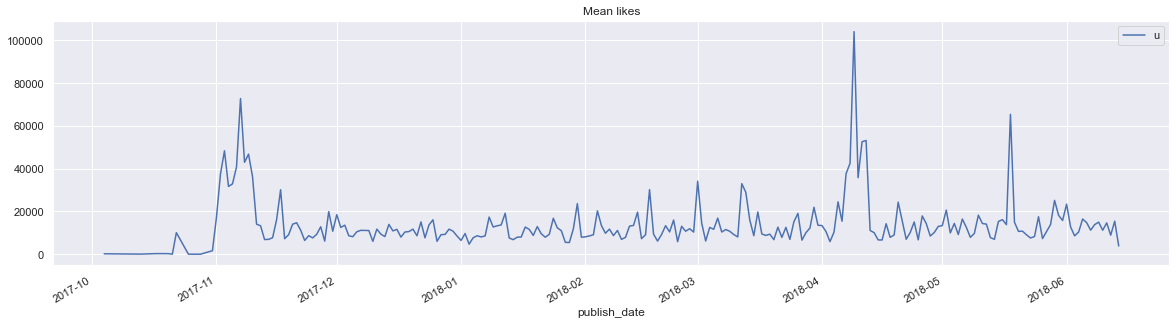

In [35]:
latest_videos = df_train[df_train['publish_date'] > '2017-10']
latest_videos_test = df_test[df_test['publish_date'] > '2017-10'] 

latest_videos.sort_values(by = 'publish_date').groupby(['publish_date'])['likes'].mean().plot(figsize = (20,5), title = 'Mean likes')
plt.yscale('linear')
plt.legend('upper right')


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   video_id       26061 non-null  int64         
 1   title          26061 non-null  object        
 2   channel_title  26061 non-null  object        
 3   category_id    26061 non-null  int64         
 4   publish_date   26061 non-null  datetime64[ns]
 5   tags           26061 non-null  object        
 6   views          26061 non-null  int64         
 7   dislikes       26061 non-null  int64         
 8   comment_count  26061 non-null  int64         
 9   description    26061 non-null  object        
 10  country_code   26061 non-null  object        
 11  likes          26061 non-null  int64         
dtypes: datetime64[ns](1), int64(6), object(5)
memory usage: 2.4+ MB


Number of Videos by country

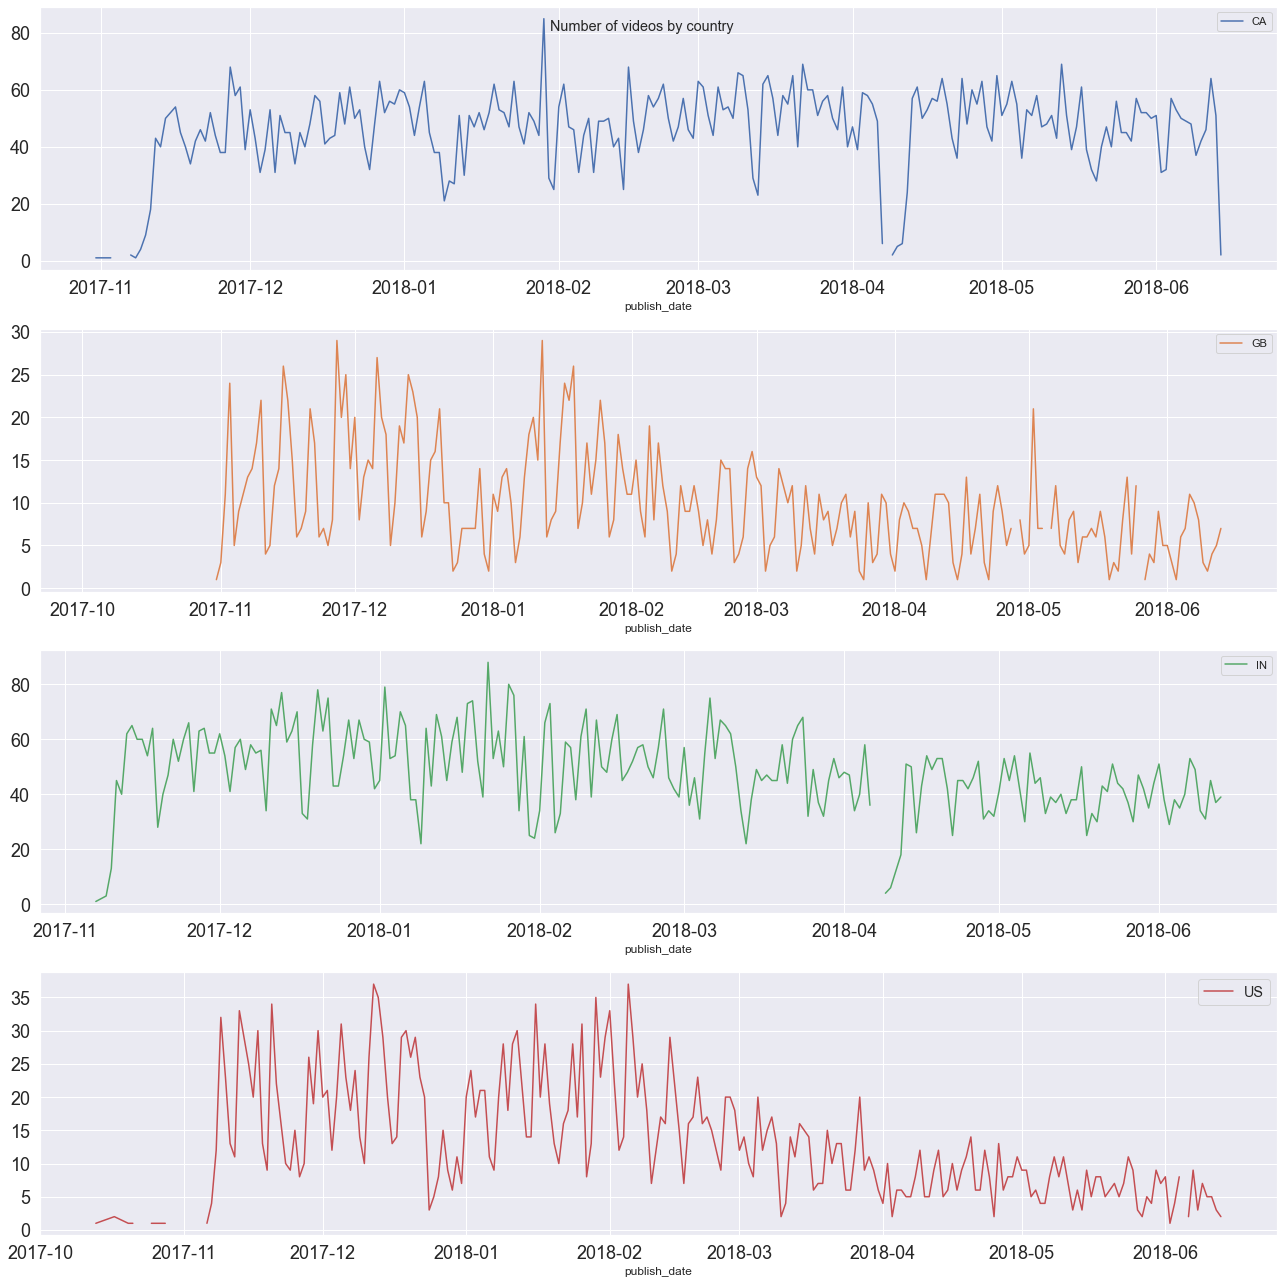

In [37]:
#Number of videos uploaded by each country after oct 2017
tmp = latest_videos.groupby(['publish_date', 'country_code']).size().reset_index()
_ = tmp.pivot_table(index = 'publish_date', columns = 'country_code', values = 0).plot(subplots = True, figsize = (18,18), 
                                                                                      title = 'Number of videos by country', 
                                                                                      fontsize = 18, sharex = False)

#plt.suptitle(f"{c}")
plt.tight_layout()
plt.legend(fontsize = 'large')
plt.show()


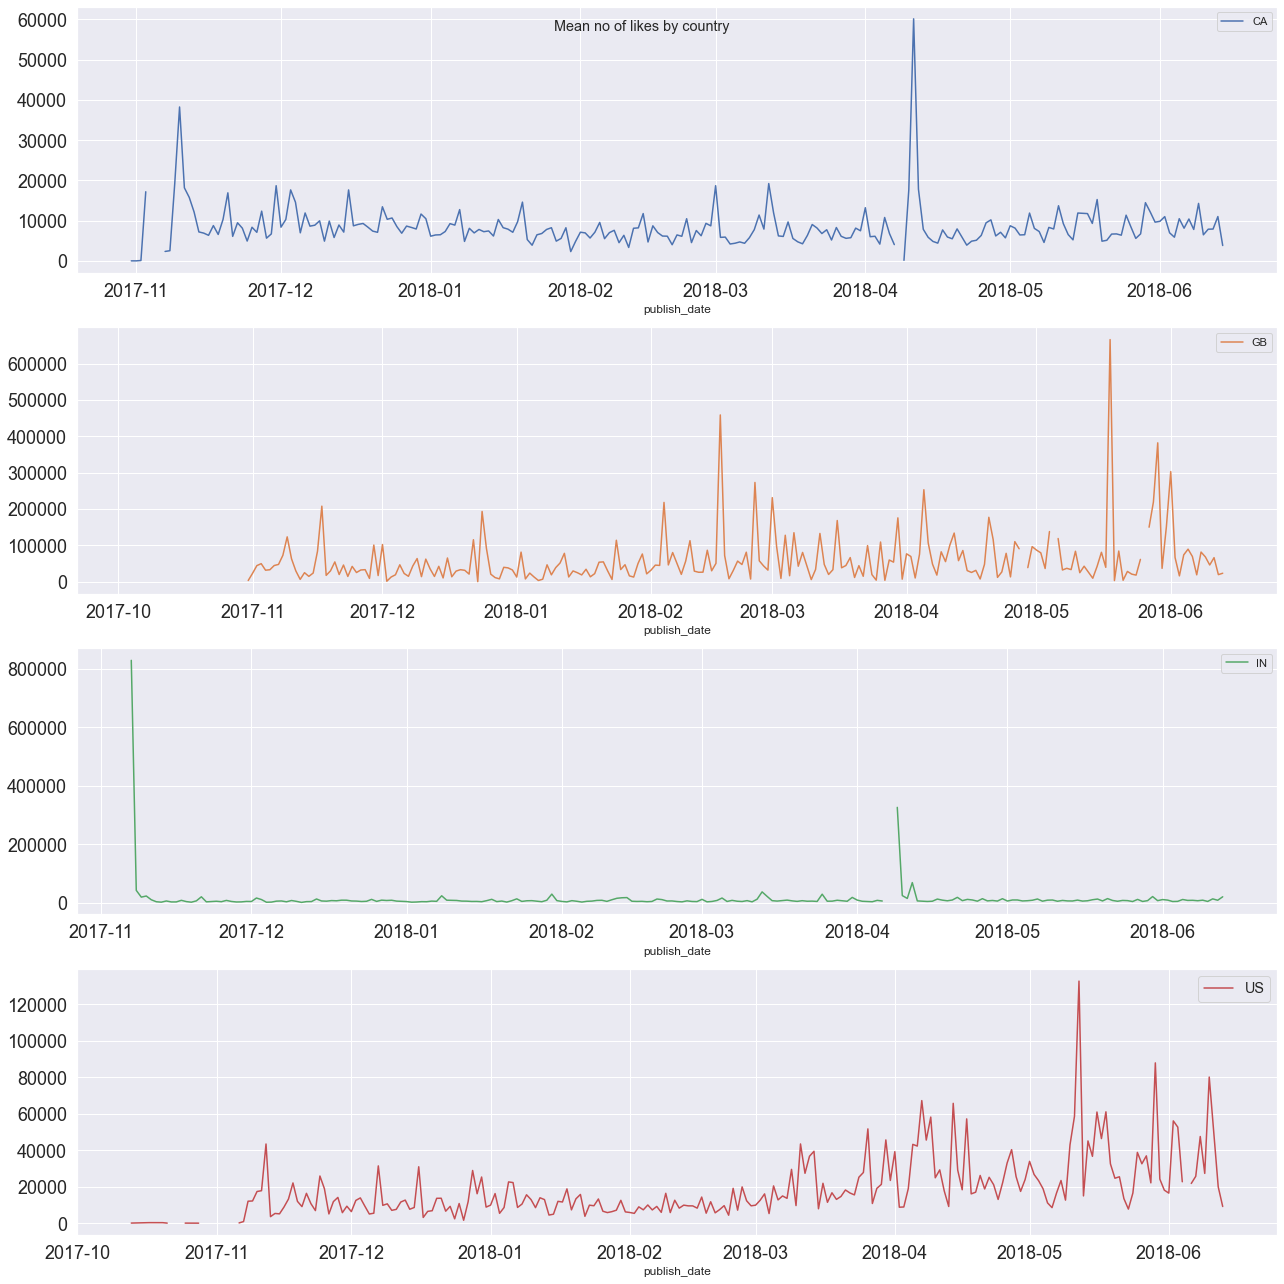

In [38]:
#Mean no of likes per each country across each month after oct 2017
lmp = latest_videos.groupby(['publish_date', 'country_code'])['likes'].mean().reset_index()
_ = lmp.pivot_table(index = 'publish_date', columns = 'country_code', values = 'likes').plot(subplots = True, figsize = (18,18), 
                                                                                      title = 'Mean no of likes by country', 
                                                                                      fontsize = 18, sharex = False)

plt.tight_layout()
plt.legend(fontsize = 'large')
plt.show()

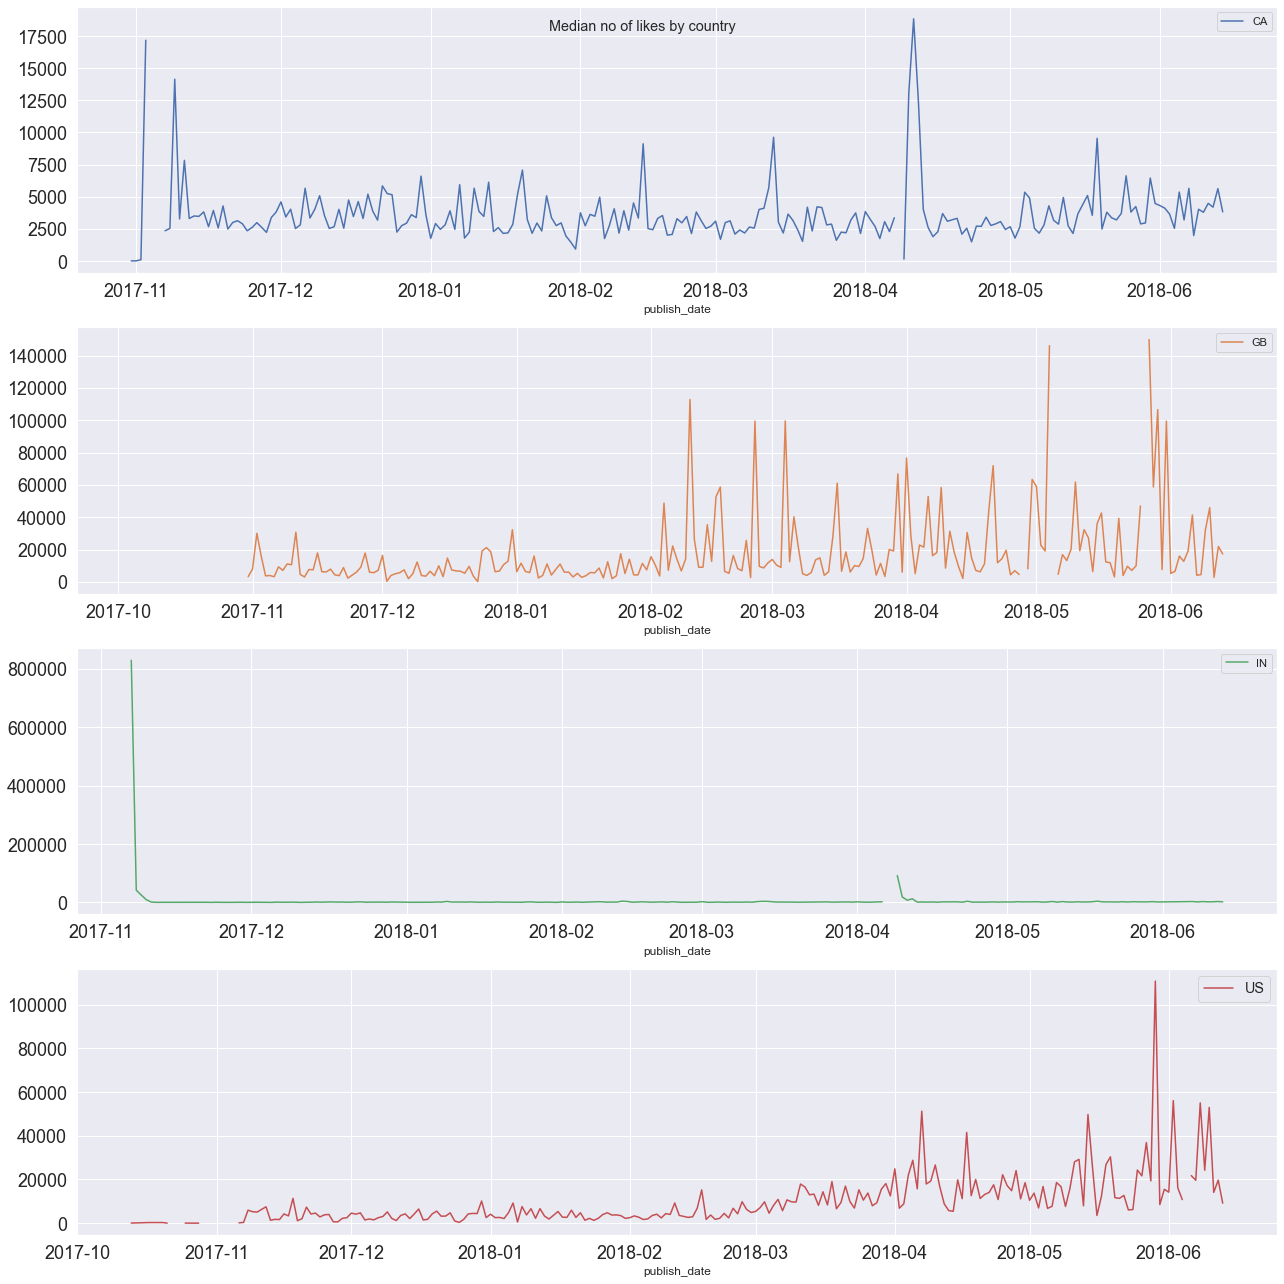

In [39]:
lmmp = latest_videos.groupby(['publish_date', 'country_code'])['likes'].median().reset_index()
_ = lmmp.pivot_table(index = 'publish_date', columns = 'country_code', values = 'likes').plot(subplots = True, figsize = (18,18), 
                                                                                      title = 'Median no of likes by country', 
                                                                                      fontsize = 18, sharex = False)

plt.tight_layout()
plt.legend(loc = 'best', fontsize = 'large')
plt.show()

In the graphs above, you could see a dip in the number of videos uploaded in US arounf the time of March 2018 and 
you would also be to observe a spike in the number of likes in the same timeframe. You could observe a similar pattern with 
India around Nov-17. 

Based on the plots above, there seems to be a pattern between drop in the number of videos and 
increase in the number of likes.

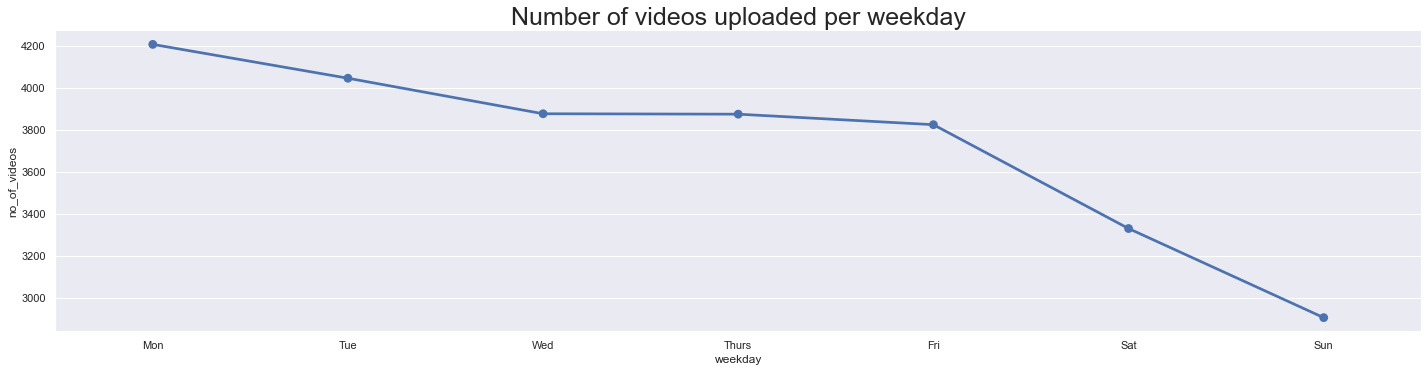

In [40]:
#Number of videos uploaded by each day of week 
df_train['day_of_week'] = df_train['publish_date'].dt.dayofweek

n_videos_per_weekday = df_train['day_of_week'].value_counts().reset_index()

n_videos_per_weekday.columns = ['weekday', 'no_of_videos']
n_videos_per_weekday['weekday'] = ['Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat', 'Sun']

sns.catplot(kind = 'point', x = 'weekday', y = 'no_of_videos', data = n_videos_per_weekday, title = 'no_of_videos_uploaded_per_weekday', 
                                           height = 5, aspect = 12/3)
plt.xlabel('weekday')
plt.ylabel('no_of_videos')
plt.title("Number of videos uploaded per weekday", fontsize = 25)
plt.show()

In [41]:
text_data = ['title', 'tags', 'description']


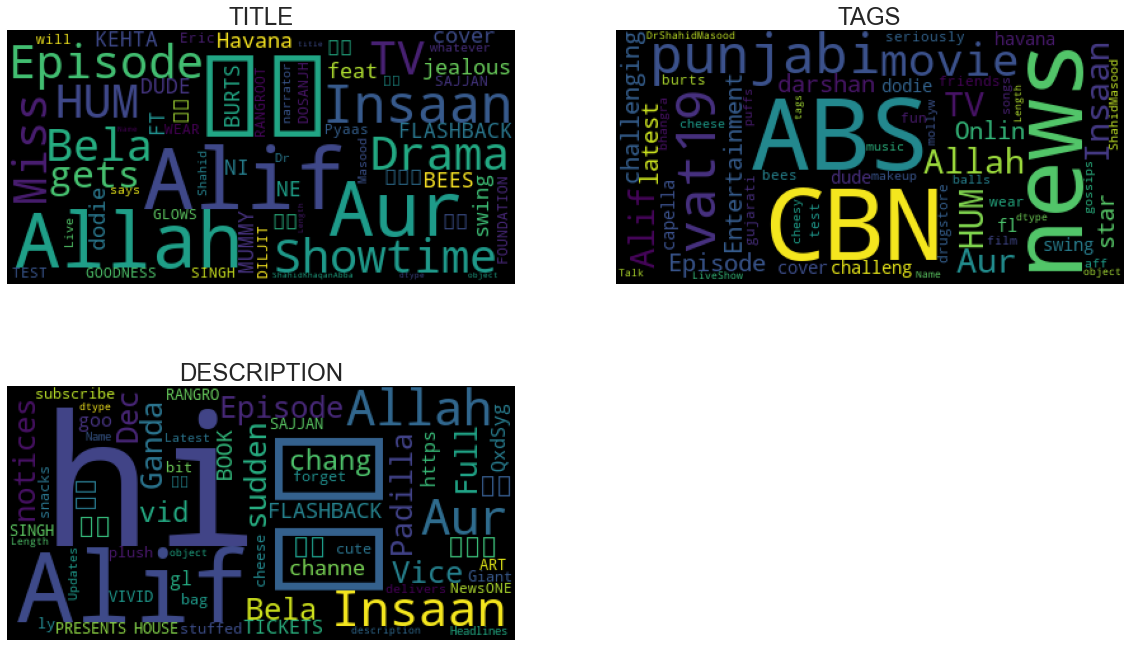

In [42]:
from wordcloud import WordCloud, STOPWORDS

wc = WordCloud(stopwords = set(list(STOPWORDS) + ['|']), random_state = 42)
fig, axes = plt.subplots(2, 2, figsize=(20, 12))
axes = [ax for axes_row in axes for ax in axes_row]

for i, c in enumerate(text_data):
    oq = wc.generate(str(df_train[c]))
    _ = axes[i].imshow(oq)
    _ = axes[i].set_title(c.upper(), fontsize=24)
    _ = axes[i].axis('off')

_ = fig.delaxes(axes[3])

In [43]:
df_train.likes.describe()

100* (df_train['likes'] > 8600).sum()/(df_train.shape[0])

24.880089021910134

In [44]:
def plot_country_wise(country_code = 'IN'):
    country = df_train[df_train['country_code'] == country_code]
    country = country[country['likes'] > 24.88]
    
    fig,axes = plt.subplots(2,2, figsize = (20,12))
    axes = [ax for axes_row in axes for ax in axes_row]
    
    for i,c in enumerate(text_data): 
        op = wc.generate(str(country[c])) 
        _ = axes[i].imshow(op)
        _ = axes[i].set_title(c.title(), fontsize = 14)
        _ = axes[i].axis('off')
        
    fig.delaxes(axes[3])
    _ = plt.suptitle(f'Country code {country_code}', fontsize = 30)
    

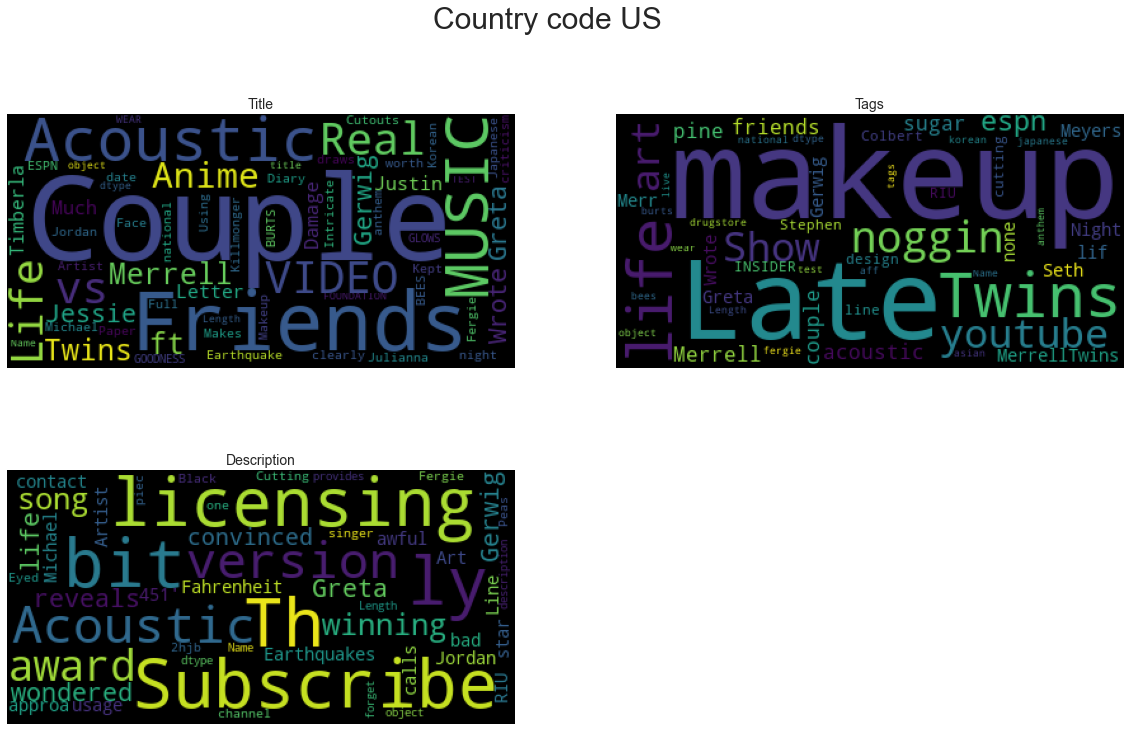

In [45]:
# Wordcloud US
plot_country_wise('US')

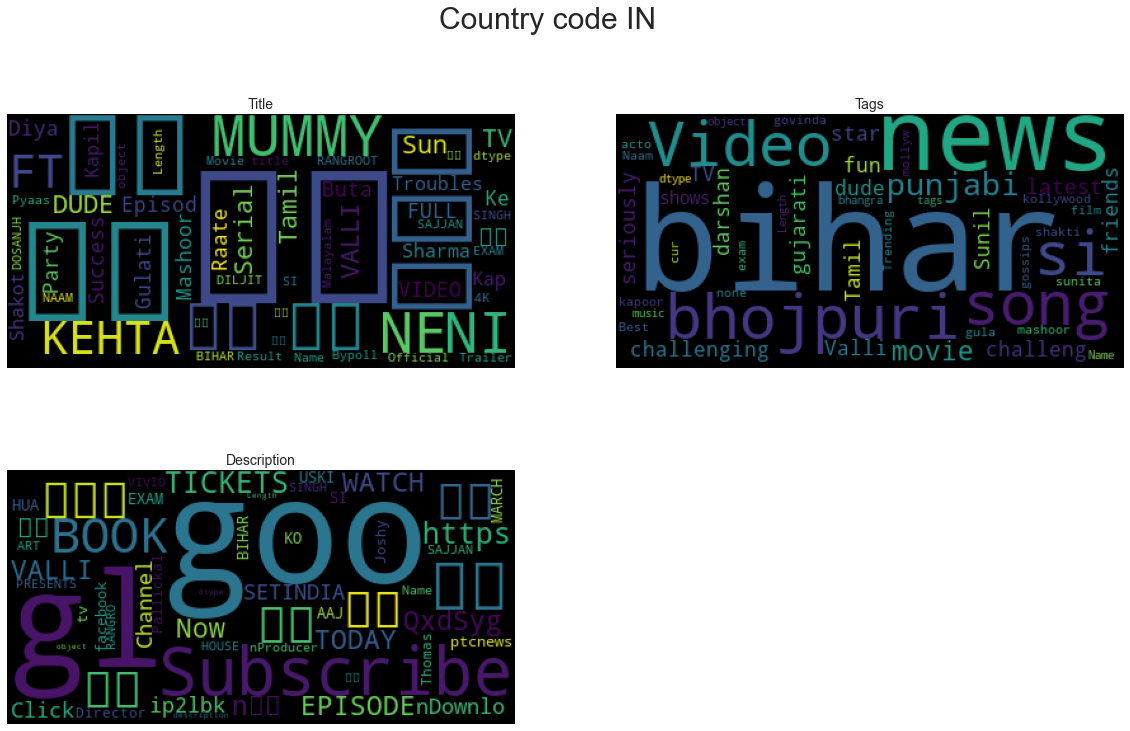

In [46]:
# Wordcloud India
plot_country_wise('IN')

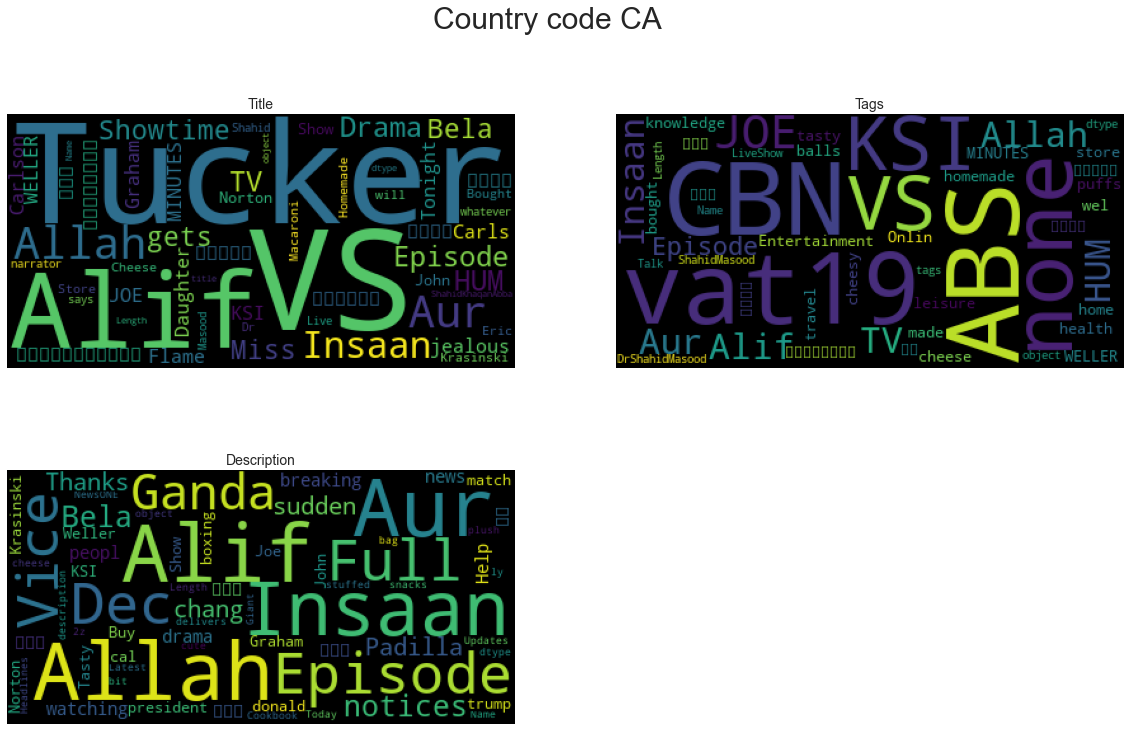

In [47]:
# Wordcloud Canada
plot_country_wise('CA')

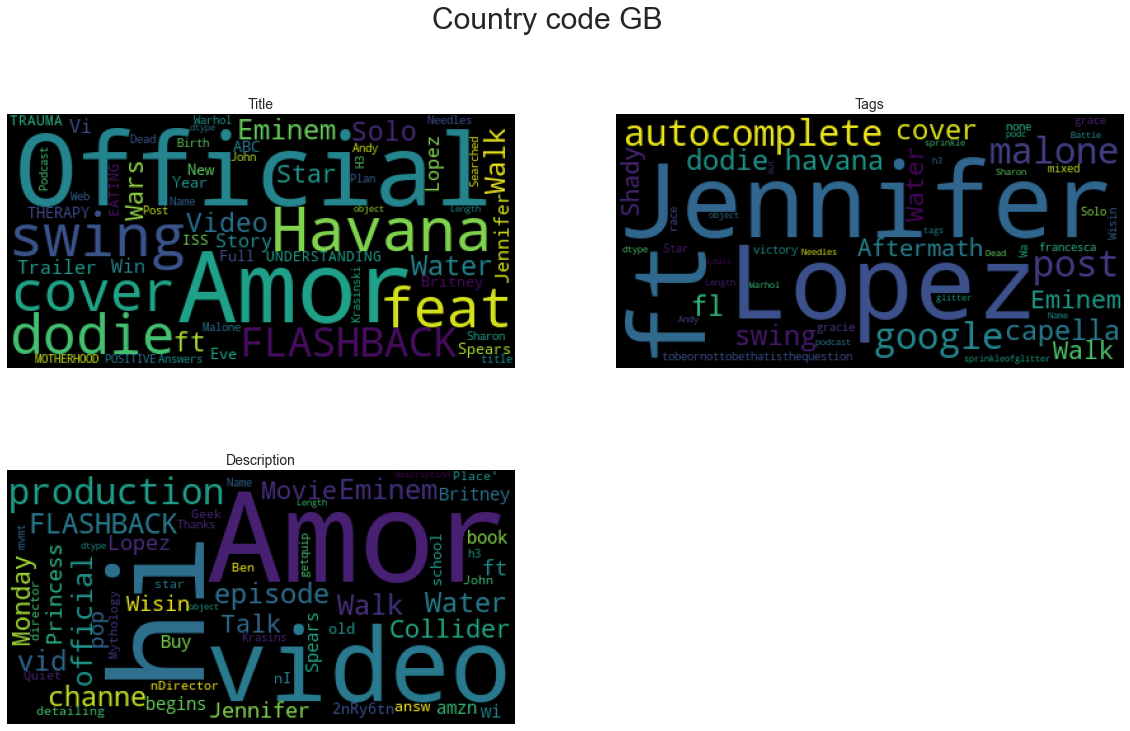

In [48]:
#Wordcloud Great Britain
plot_country_wise('GB')

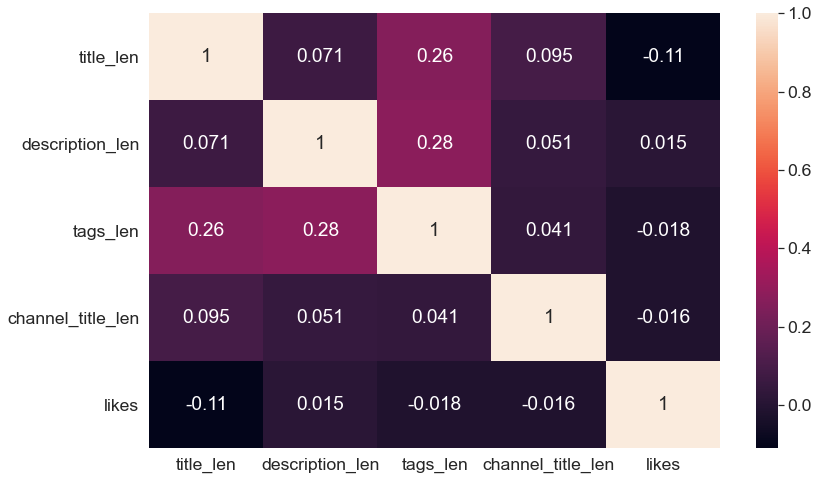

In [49]:
#Heatmap and correlation coefficients for textual data length and number of likes
sns.set(font_scale = 1.6)
df_train['title_len'] = df_train['title'].apply(lambda x: len(x))
df_train['description_len'] = df_train['description'].apply(lambda x: len(x))
df_train['tags_len'] = df_train['tags'].apply(lambda x: len(x))
df_train['channel_title_len'] = df_train['channel_title'].apply(lambda x: len(x))

_  = sns.heatmap(df_train[['title_len', 'description_len', 'tags_len', 'channel_title_len', 'likes']].corr(), annot = True)

In [50]:
#Setting callable objects for the id and the target column
id_column, Target_column = 'video_id', 'likes'

In [51]:
#Reading data in again to make baseline predictions
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

train_df[num_cols + ['likes']] = train_df[num_cols + ['likes']].apply(lambda x: np.log1p(x))
test_df[num_cols] = test_df[num_cols].apply(lambda x: np.log1p(x))

In [52]:
#Creating a helper function to create and download baseline prediction csv files
from IPython.display import HTML
import base64

def create_download_link(df, title = "Download CSV file", filename = "data.csv"):  
    csv = df.to_csv()
    b64 = base64.b64encode(csv.encode())
    payload = b64.decode()
    html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
    html = html.format(payload=payload,title=title,filename=filename)
    return HTML(html)



def download_preds(preds_test, file_name = 'hacklive_sub.csv'):

  ## 1. Setting the target column with our obtained predictions
  sub_file[Target_column] = preds_test

  ## 2. Saving our predictions to a csv file

  sub_file.to_csv(file_name, index = False)
    
    

  ## 3. Downloading and submitting the csv file
  create_download_link(df = sub_file, filename = file_name)


In [53]:
#Reading in the sample submission file to use it as a reference to create baseline prediction files
sub_file = pd.read_csv('sample_submission_cxCGjdN.csv')

# Model A: Predicting all instances as mean 

In [54]:
#Importing and defining evaluation functions
from sklearn.metrics import mean_squared_error, mean_squared_log_error

#Root mean squared log error
def rmsle (y_true, y_pred): 
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred): 
    return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

target = train_df[Target_column]

In [55]:

preds_target = pd.Series([target.mean()] * len(train_df))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1927.8618309979083


In [56]:
preds_test = pd.Series([target.mean()] * len(test_df))
download_preds(preds_test, file_name = 'hacklive2_mean_preds.csv')

pd.read_csv('hacklive2_mean_preds.csv')

video_id  likes
0         87185   7.74
1          9431   7.74
2         40599   7.74
3           494   7.74
4         73942   7.74
...         ...    ...
11165     19415   7.74
11166     25168   7.74
11167     80293   7.74
11168     80880   7.74
11169      6514   7.74

[11170 rows x 2 columns]

# Model B: Predicting using the median of Likes 

In [57]:
preds_target = pd.Series([target.median()] * len(train_df))

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1930.4927341163989


In [58]:
preds_test = pd.Series([target.median()] * len(test_df))
preds_test = np.expm1(preds_test)
download_preds(preds_test, file_name = 'hacklive2_median_preds.csv')



# Model C: Predicting using number of views 

In [59]:
likes_per_view = ((train_df['likes'] + 1)/(train_df['views'] + 1))
likes_per_view.mean()

0.6723608458619709

In [60]:
preds_target = train_df['views'] * 0.677

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1473.9157749667165


In [61]:
preds_test = test_df['views'] * 0.672
preds_test = np.expm1(preds_test)
download_preds(preds_test, file_name =  'hacklive2_preds_using_views.csv')

# Model D: Predicting using number of comments 

In [62]:
likes_per_comment = (train_df['likes'] + 1)/(train_df['comment_count'] + 1)
likes_per_comment.mean()

1.370729312306306

In [63]:
preds_target = train_df['comment_count'] * 1.37

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1549.204914717152


In [64]:
preds_test = test_df['comment_count'] * 1.37
preds_test = np.expm1(preds_test)
download_preds(preds_test, file_name =  'hacklive2_preds_using_num_comments.csv')

# Model E: Predicting using dislikes

In [65]:
likes_per_dislike = (train_df['likes'] + 1)/(train_df['dislikes']+1)
likes_per_dislike.mean()

1.523152073084116

In [66]:
preds_target = train_df['dislikes'] * 1.52

av_metric_score = av_metric(target, preds_target)

print(f'AV metric score is: {av_metric_score}')

AV metric score is: 1550.5421251222745


In [67]:
preds_test = test_df['dislikes'] * 1.52
preds_test = np.expm1(preds_test)
download_preds(preds_test, file_name =  'hacklive2_preds_using_dislikes.csv')

# Going into the modelling part using SKLearn`

In [68]:
import sklearn



In [69]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

df_train.head()

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title  category_id publish_date  \
0                 HUM TV         24.0   2017-12-12   
1  ABS-CBN Entertainment         24.0   2018-03-08   
2     SANDALWOOD REVIEWS         24.0   2018-03-26   
3            doddleoddle         10.0   2018-02-21   
4         Dude Seriously         23.0   2018-05-10   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726.0     847.0   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311.0      69.0   

   comment_count                                        description  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3         4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...   
4          161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   

  country_code    likes  
0           CA   2351.0  
1           CA   3264.0  
2           IN    580.0  
3           GB  82773.0  
4           IN   3557.0

In [70]:
Target_col, Id_col = 'likes', 'video_id'

num_cols = ['views', 'dislikes', 'comment_count']
text_cols = ['channel_title', 'tags', 'description', 'title']
cat_cols = ['category_id', 'country_code']
date_col = ['publish_date']


In [71]:
#Joining the train and the test datasets to perform transformations
df = pd.concat([df_train, df_test], axis = 0).reset_index(drop = True)

df.shape


(37231, 12)

In [72]:
df.tail()

video_id                                              title  \
37226     19415  Tapu Sena's Summer Vacation | Tapu Sena Specia...   
37227     25168        Senselet Drama S02 EP43 ሰንሰለት ምዕራፍ 2 ክፍል 43   
37228     80293           Being Woman | Girl Formula | Chai Bisket   
37229     80880                  Deivamagal Episode 1455, 05/02/18   
37230      6514  They Are Doing Things That Should Truly Scare You   

        channel_title  category_id publish_date  \
37226          SAB TV         24.0   2018-03-30   
37227  Senselet Drama          1.0   2018-04-28   
37228    Girl Formula         24.0   2018-03-08   
37229       VikatanTV         43.0   2018-02-05   
37230          Amplex         24.0   2018-03-08   

                                                    tags      views  dislikes  \
37226  tapu sena special|"tapu special clips"|"taarak...  2.933e+05     280.0   
37227  Senselet|"Senselet part 43"|"senselet 43"|"Zem...  1.485e+05     116.0   
37228  girl formula|"short film"|"telugu"|"telugu fun...  1.383e+05     150.0   
37229  deivamagal|"deiva magal"|"deiva magal serial"|...  1.024e+06    3212.0   
37230  educational|"secrets"|"hidden"|"truth"|"myster...  1.481e+05     188.0   

       comment_count                                        description  \
37226          123.0  Click here to Subscribe to SAB TV Channel : ht...   
37227          863.0  ድርሰት: ተመስገን አፈወርቅ\nአዘጋጆች: ቴዎድሮስ ለገሰ ብዙ እና ተመስገ...   
37228         1539.0  Don't put her on a pedestal. Don't shame her f...   
37229         1075.0  Deivamagal Episode 1455\nSubscribe: https://go...   
37230          935.0  ➨Check Out our Online Store: https://amplex-li...   

      country_code  likes  
37226           IN    NaN  
37227           CA    NaN  
37228           IN    NaN  
37229           IN    NaN  
37230           CA    NaN

In [73]:
df['category_id'].nunique()

17

In [74]:
df = pd.get_dummies(data = df, columns = cat_cols, drop_first = True)

df.head()

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title publish_date  \
0                 HUM TV   2017-12-12   
1  ABS-CBN Entertainment   2018-03-08   
2     SANDALWOOD REVIEWS   2018-03-26   
3            doddleoddle   2018-02-21   
4         Dude Seriously   2018-05-10   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726.0     847.0   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311.0      69.0   

   comment_count                                        description    likes  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   2351.0   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   3264.0   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...    580.0   
3         4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...  82773.0   
4          161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   3557.0   

   ...  category_id_25.0  category_id_26.0  category_id_27.0  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   category_id_28.0  category_id_29.0  category_id_30.0  category_id_43.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_GB  country_code_IN  country_code_US  
0                0                0                0  
1                0                0                0  
2                0                1                0  
3                1                0                0  
4                0                1                0  

[5 rows x 29 columns]

In [75]:
df.shape


(37231, 29)

In [76]:
df = df.fillna(-99)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   video_id          37231 non-null  int64  
 1   title             37231 non-null  object 
 2   channel_title     37231 non-null  object 
 3   publish_date      37231 non-null  object 
 4   tags              37231 non-null  object 
 5   views             37231 non-null  float64
 6   dislikes          37231 non-null  float64
 7   comment_count     37231 non-null  float64
 8   description       37231 non-null  object 
 9   likes             37231 non-null  float64
 10  category_id_2.0   37231 non-null  uint8  
 11  category_id_10.0  37231 non-null  uint8  
 12  category_id_15.0  37231 non-null  uint8  
 13  category_id_17.0  37231 non-null  uint8  
 14  category_id_19.0  37231 non-null  uint8  
 15  category_id_20.0  37231 non-null  uint8  
 16  category_id_22.0  37231 non-null  uint8 

In [77]:
df.isnull().sum().sum()

0

In [78]:
df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))

df.head()

C:\Users\sachi\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title publish_date  \
0                 HUM TV   2017-12-12   
1  ABS-CBN Entertainment   2018-03-08   
2     SANDALWOOD REVIEWS   2018-03-26   
3            doddleoddle   2018-02-21   
4         Dude Seriously   2018-05-10   

                                                tags   views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  12.770     5.700   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  13.042     4.317   
2  challenging star darshan latest news|"challeng...  10.602     5.017   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  13.142     6.743   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...  11.216     4.248   

   comment_count                                        description   likes  \
0          6.804  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   7.763   
1          5.753  Vice Ganda notices Bela Padilla's sudden chang...   8.091   
2          4.615  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   6.365   
3          8.420  Hi hi hi! here's our vid on FLASHBACK's channe...  11.324   
4          5.088  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   8.177   

   ...  category_id_25.0  category_id_26.0  category_id_27.0  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 0                 0   
4  ...                 0                 0                 0   

   category_id_28.0  category_id_29.0  category_id_30.0  category_id_43.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_GB  country_code_IN  country_code_US  
0                0                0                0  
1                0                0                0  
2                0                1                0  
3                1                0                0  
4                0                1                0  

[5 rows x 29 columns]

In [79]:
train_set, test_set = df[:df_train.shape[0]], df[df_train.shape[0]:].reset_index(drop = True)

test_set.head()

video_id                                              title  \
0     87185  జనవరి 31 గ్రహణం రోజు కొడుకులు ఉన్నవాళ్లు ఏం చే...   
1      9431  ठाणे:'जेव्हा सत्ता बदलेल तेव्हा केस तुमच्यावरह...   
2     40599                           Thank you, Rider Nation!   
3       494  Measuring RPM with a spectrum analyzer mobile app   
4     73942  Anchor Anasuya responded on Phone breaking iss...   

              channel_title publish_date  \
0     CHIRRAVURI FOUNDATION   2018-01-17   
1           VIRAL IN  INDIA   2017-11-18   
2  Saskatchewan Roughriders   2017-12-01   
3           Matthias Wandel   2018-02-06   
4     AVA Creative thoughts   2018-02-06   

                                                tags   views  dislikes  \
0  Chirravuri|"Foundation"|"chirravuri foundation...  11.300     4.007   
1  Raj Thackeray|"LIVE SPEECH"|"latest Speech"|"r...  11.921     5.442   
2  Roughriders|"Riders"|"CFL"|"Regina"|"Saskatche...   8.789     2.398   
3  rpm|"woodworking"|"tool speed"|"blade speed"|"...  11.404     4.984   
4  anasuya responded|"anasuya issue"|"anasuya bor...  10.888     5.881   

   comment_count                                        description  likes  \
0          4.382  8885569579...CHIRRAVURI FOUNDATION.\n\n☛Subsct...    NaN   
1          5.743  Don't Forget to SUBSCIRBE to our YouTube Chann...    NaN   
2          2.079  “To the devoted, the impassioned, the loyal:\n...    NaN   
3          5.784  Using a spectrum analyzer app to analyze the s...    NaN   
4          5.037  Welcome to AVA Creative thoughts Channel Subsc...    NaN   

   ...  category_id_25.0  category_id_26.0  category_id_27.0  \
0  ...                 0                 0                 0   
1  ...                 0                 0                 0   
2  ...                 0                 0                 0   
3  ...                 0                 1                 0   
4  ...                 0                 0                 0   

   category_id_28.0  category_id_29.0  category_id_30.0  category_id_43.0  \
0                 0                 0                 0                 0   
1                 0                 0                 0                 0   
2                 0                 0                 0                 0   
3                 0                 0                 0                 0   
4                 0                 0                 0                 0   

   country_code_GB  country_code_IN  country_code_US  
0                0                1                0  
1                0                1                0  
2                0                0                0  
3                0                0                1  
4                0                1                0  

[5 rows x 29 columns]

In [80]:
features = [c for c in train_set.columns if c not in [Target_col, Id_col]]



In [81]:
from sklearn.model_selection import train_test_split
train, val = train_test_split(train_set, test_size = 0.22, random_state = 102)

val.shape

(5734, 29)

In [82]:
X_train, X_val = train[features], val[features]
y_train, y_val = train[Target_col], val[Target_col]

X_test = test_set[features]

X_train.shape
X_test.shape

(11170, 27)

In [83]:
#Importing and defining evaluation functions
from sklearn.metrics import mean_squared_error, mean_squared_log_error

#Root mean squared log error
def rmsle (y_true, y_pred): 
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

def av_metric(y_true, y_pred): 
    return 1000 * np.sqrt(mean_squared_error(y_true, y_pred))

In [84]:
#Building a linear regression model with just the numerical variables
from sklearn.linear_model import LinearRegression 

linmod = LinearRegression()

linmod.fit(X_train[num_cols], y_train)

y_train_pred = linmod.predict(X_train[num_cols])




print(f"The av_metric score is {av_metric(y_train, y_train_pred)}")



The av_metric score is 939.7434810212619


In [85]:

num_mod_test_pred = linmod.predict(X_test[num_cols])
num_mod_test_pred = np.expm1(num_mod_test_pred)

download_preds(num_mod_test_pred, file_name = 'num_mod_test_preds.csv')


In [86]:
pd.read_csv("num_mod_test_preds.csv")

video_id      likes
0         87185    696.959
1          9431   2689.835
2         40599     61.199
3           494   2070.482
4         73942   1601.335
...         ...        ...
11165     19415   2086.866
11166     25168   3738.122
11167     80293   5418.881
11168     80880  20076.706
11169      6514   4535.103

[11170 rows x 2 columns]

In [87]:
# Building a model with numerical variables and categorical variables

X_train.columns

cat_num_cols = [c for c in features if c not in text_cols + date_col]
len(cat_num_cols)

print(cat_num_cols)

['views', 'dislikes', 'comment_count', 'category_id_2.0', 'category_id_10.0', 'category_id_15.0', 'category_id_17.0', 'category_id_19.0', 'category_id_20.0', 'category_id_22.0', 'category_id_23.0', 'category_id_24.0', 'category_id_25.0', 'category_id_26.0', 'category_id_27.0', 'category_id_28.0', 'category_id_29.0', 'category_id_30.0', 'category_id_43.0', 'country_code_GB', 'country_code_IN', 'country_code_US']


In [88]:
catnum_mod = LinearRegression()

catnum_mod.fit(X_train[cat_num_cols], y_train)


y_train_pred = catnum_mod.predict(X_train[cat_num_cols])

print(f'The av_metric score {av_metric(y_train, y_train_pred)}')

The av_metric score 866.7235462210571


In [89]:
catnum_mod_test_pred = catnum_mod.predict(X_test[cat_num_cols])
catnum_mod_test_pred = np.expm1(catnum_mod_test_pred)

download_preds(catnum_mod_test_pred, file_name = "catnum_mod_test_preds.csv")

In [90]:
pd.read_csv("catnum_mod_test_preds.csv")

video_id      likes
0         87185    619.776
1          9431   2245.050
2         40599     58.247
3           494   3912.042
4         73942   1422.265
...         ...        ...
11165     19415   1852.201
11166     25168   3809.599
11167     80293   4067.748
11168     80880  10948.424
11169      6514   4050.613

[11170 rows x 2 columns]

In [91]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state = 46)

dtr.fit(X_train[cat_num_cols], y_train)

y_train_pred_dtr = dtr.predict(X_train[cat_num_cols])

av_metric(y_train, y_train_pred_dtr)

y_val_pred_dtr = dtr.predict(X_val[cat_num_cols])
av_metric(y_val, y_val_pred_dtr)


933.1843351273137

# Performing Random Search Cross Validation 

In [92]:
from sklearn.model_selection import RandomizedSearchCV


hyperparams_combo = { 'max_depth': [4, 6, 8, 10, 12], 
                'min_samples_split': [2,10,20,30,40],
                'max_features': [0.2, 0.4, 0.6, 0.8, 1.0],
                'max_leaf_nodes': [8, 16, 32, 64, 128]}

rso = RandomizedSearchCV(DecisionTreeRegressor(), hyperparams_combo, scoring = 'neg_root_mean_squared_error', 
                        random_state = 42, n_iter = 80)

search = rso.fit(train_set[cat_num_cols], train_set[Target_col])

search.best_params_

{'min_samples_split': 40,
 'max_leaf_nodes': 128,
 'max_features': 0.8,
 'max_depth': 12}

In [93]:
best_params = {'min_samples_split': 10,
 'max_leaf_nodes': 128,
 'max_features': 1.0,
 'max_depth': 12}

dtr = DecisionTreeRegressor(**best_params, random_state = 42)
dtr.fit(X_train[cat_num_cols], y_train)

y_val_pred_dtr = dtr.predict(X_val[cat_num_cols])

av_metric(y_val, y_val_pred_dtr)

762.4404460572015

In [94]:
dtr_test_pred = dtr.predict(X_test[cat_num_cols])
dtr_test_pred = np.expm1(dtr_test_pred)

download_preds(dtr_test_pred, file_name = "dtr_test_preds.csv")

In [95]:
#Trying to find the best parameters for a linear regression model using grid search
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.feature_selection import RFE



hyper_params = {'n_features_to_select' : list(range(1, 21))}
#gso = GridSearchCV(GridSearchCV(), hyperparams_combo, scoring = 'neg_root_mean_squared_error', random_state = 42)



# creating a cross-validation schemer
folds = KFold(n_splits = 5, shuffle = True, random_state = 42)


# performing grid search

lm = LinearRegression()
lm.fit(X_train[cat_num_cols], y_train)
rfe = RFE(lm, 20)             

# 3.2 call GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train[cat_num_cols], y_train)              

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=20 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   17.7s finished


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression(),
                           n_features_to_select=20),
             param_grid={'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                  11, 12, 13, 14, 15, 16, 17,
                                                  18, 19, 20]},
             return_train_score=True, scoring='r2', verbose=1)

In [96]:
cv_results = pd.DataFrame(model_cv.cv_results_)

cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           0.180     2.889e-02            0.002       2.315e-03   
1           0.211     4.854e-03            0.005       3.881e-03   
2           0.210     4.355e-03            0.008       4.306e-04   
3           0.218     1.136e-02            0.005       4.103e-03   
4           0.204     7.488e-04            0.006       3.039e-03   
5           0.196     1.121e-02            0.009       2.392e-03   
6           0.198     7.078e-03            0.007       3.300e-03   
7           0.201     5.973e-03            0.007       5.089e-03   
8           0.197     1.433e-02            0.004       3.700e-03   
9           0.182     1.331e-02            0.005       3.216e-03   
10          0.175     1.056e-02            0.005       4.444e-03   
11          0.165     7.908e-03            0.008       9.041e-04   
12          0.148     1.084e-02            0.008       2.694e-03   
13          0.140     1.216e-02            0.004       3.479e-03   
14          0.131     6.286e-03            0.010       3.366e-03   
15          0.117     6.377e-03            0.006       2.457e-03   
16          0.100     6.752e-03            0.006       1.513e-03   
17          0.092     6.794e-03            0.005       3.795e-03   
18          0.083     2.469e-03            0.002       2.921e-03   
19          0.061     6.362e-03            0.006       1.516e-03   

   param_n_features_to_select                        params  \
0                           1   {'n_features_to_select': 1}   
1                           2   {'n_features_to_select': 2}   
2                           3   {'n_features_to_select': 3}   
3                           4   {'n_features_to_select': 4}   
4                           5   {'n_features_to_select': 5}   
5                           6   {'n_features_to_select': 6}   
6                           7   {'n_features_to_select': 7}   
7                           8   {'n_features_to_select': 8}   
8                           9   {'n_features_to_select': 9}   
9                          10  {'n_features_to_select': 10}   
10                         11  {'n_features_to_select': 11}   
11                         12  {'n_features_to_select': 12}   
12                         13  {'n_features_to_select': 13}   
13                         14  {'n_features_to_select': 14}   
14                         15  {'n_features_to_select': 15}   
15                         16  {'n_features_to_select': 16}   
16                         17  {'n_features_to_select': 17}   
17                         18  {'n_features_to_select': 18}   
18                         19  {'n_features_to_select': 19}   
19                         20  {'n_features_to_select': 20}   

    split0_test_score  split1_test_score  split2_test_score  \
0               0.065              0.053              0.053   
1               0.065              0.054              0.677   
2               0.709              0.673              0.693   
3               0.725              0.690              0.693   
4               0.726              0.690              0.696   
5               0.727              0.691              0.696   
6               0.727              0.767              0.697   
7               0.787              0.771              0.698   
8               0.791              0.775              0.775   
9               0.791              0.775              0.775   
10              0.792              0.775              0.776   
11              0.792              0.776              0.776   
12              0.793              0.776              0.777   
13              0.806              0.784              0.788   
14              0.807              0.784              0.790   
15              0.807              0.787              0.790   
16              0.807              0.787              0.791   
17              0.807              0.787              0.791   
18              0.807              0.788              

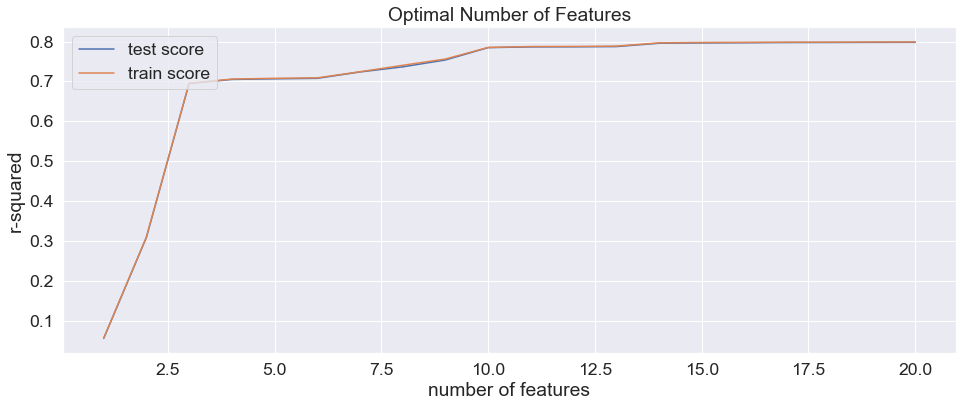

In [97]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [98]:
optimal_features = 14

model = LinearRegression()

rfe = RFE(model, 24)

rfe.fit(X_train[cat_num_cols], y_train)

y_val_rfe_pred = rfe.predict(X_val[cat_num_cols])

av_metric(y_val, y_val_rfe_pred)

C:\Users\sachi\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=24 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


864.3771314391485

# Linear Regression didn't produce a model better than Decision Tree Regressor

To recitify the imbalance in the number of likes while training the model using Kfold cross validation, we could bin the 
number of likes and run Stratified KFold cross validation on that. 

In [99]:
pd.qcut(np.arange(10), 10, labels = False, duplicates = 'drop')

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [100]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

def run_strat_kfold(model, train, test, features): 
    
    N_splits = 5
    
    oofs = np.zeros(len(train_set))
    preds = np.zeros(len(test_set))
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state= 42)
    
    stratified_target = pd.qcut(train[Target_col], 10, labels = False, duplicates = 'drop')
    
    for fold_, (train_idx, val_idx) in enumerate(folds.split(train, stratified_target)): 
        print(f'\n---------------- Fold{fold_ + 1} ----------------------')
        
        # Train set and target column
        X_train, y_train = train[features].iloc[train_idx], target.iloc[train_idx]
        
        #validation set and target column
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]
        
        X_test = test[features]
        
        scaler = StandardScaler()
        
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train)
        
        ### Instead of predicting directlly, we'll obtain the probability of each class
        
        y_preds_val = model.predict(X_val)
        y_preds_test = model.predict(X_test)
        
        
        fold_score = av_metric(y_val, y_preds_val)
        
        print(f"\n av_metric score for validation test is {fold_score}")
        
        
        oofs[val_idx] = y_preds_val
        preds += y_preds_test / N_splits
        
        
        oofs_score = av_metric(target, oofs)
        
    print(f'\n\n av_metric for oofs is {oofs_score}')
    return oofs, preds

In [101]:
mod = LinearRegression()

lr_oofs, lr_preds = run_strat_kfold(mod, train_set, test_set, cat_num_cols)


---------------- Fold1 ----------------------

 av_metric score for validation test is 856.8643536150788

---------------- Fold2 ----------------------

 av_metric score for validation test is 870.5956713974426

---------------- Fold3 ----------------------

 av_metric score for validation test is 850.1396686359868

---------------- Fold4 ----------------------

 av_metric score for validation test is 893.2046485633872

---------------- Fold5 ----------------------

 av_metric score for validation test is 865.9380041411839


 av_metric for oofs is 867.4733956816328


In [102]:
dt_params = {'min_samples_split': 10,
 'max_leaf_nodes': 128,
 'max_features': 1.0,
 'max_depth': 12}

dtr = DecisionTreeRegressor(**dt_params)

dt_oofs, dt_preds = run_strat_kfold(dtr, train_set, test_set, cat_num_cols)


---------------- Fold1 ----------------------

 av_metric score for validation test is 743.8547014788624

---------------- Fold2 ----------------------

 av_metric score for validation test is 754.6460877575288

---------------- Fold3 ----------------------

 av_metric score for validation test is 751.1502001935168

---------------- Fold4 ----------------------

 av_metric score for validation test is 753.6086969008129

---------------- Fold5 ----------------------

 av_metric score for validation test is 775.3959414760845


 av_metric for oofs is 755.8040293395995


In [103]:
dt_preds.shape

(11170,)

In [104]:
strat_dtr_catnum_test_pred = np.expm1(dt_preds)

download_preds(strat_dtr_catnum_test_pred, file_name = 'strat_dtr_catnum_test_pred.csv')

# Running Gradient Boosting on the Decision Tree Regressor

In [105]:
from lightgbm import LGBMRegressor

lgb = LGBMRegressor()

lgb_oofs, lgb_preds = run_strat_kfold(lgb, train_set, test_set, cat_num_cols)


---------------- Fold1 ----------------------

 av_metric score for validation test is 654.7665520164159

---------------- Fold2 ----------------------

 av_metric score for validation test is 673.5046295895031

---------------- Fold3 ----------------------

 av_metric score for validation test is 668.5646361057661

---------------- Fold4 ----------------------

 av_metric score for validation test is 669.4871219373958

---------------- Fold5 ----------------------

 av_metric score for validation test is 690.1259997927136


 av_metric for oofs is 671.3849968489405


In [106]:
strat_lgbm_catnum_test_pred = np.expm1(lgb_preds)

download_preds(strat_lgbm_catnum_test_pred, file_name = 'strat_lgbm_catnum_pred.csv')

In [107]:
def run_gradient_boosting(model, fit_params, train, test, features): 
    
    N_splits = 5
    
    oofs = np.zeros(len(train_set))
    preds = np.zeros(len(test_set))
    
    folds = StratifiedKFold(n_splits = N_splits, shuffle = True, random_state= 42)
    stratified_target = pd.qcut(train[Target_col], 10, labels = False, duplicates = 'drop')
    
    feature_importances = pd.DataFrame()
    
    for fold_, (train_idx, val_idx) in enumerate(folds.split(train, stratified_target)): 
        print(f'\n---------------- Fold{fold_ + 1} ----------------------')
        
        # Train set and target column
        X_train, y_train = train[features].iloc[train_idx], target.iloc[train_idx]
        
        #validation set and target column
        X_val, y_val = train[features].iloc[val_idx], target.iloc[val_idx]
        
        X_test = test[features]
        
        scaler = StandardScaler()
        
        scaler.fit(X_train)
        
        X_train = scaler.transform(X_train)
        X_val = scaler.transform(X_val)
        X_test = scaler.transform(X_test)
        
        model.fit(X_train, y_train, eval_set = [(X_val, y_val)], **fit_params)
        
        fold_importance = pd.DataFrame({'fold': fold_ + 1, 'feature': features, 'importance': model.feature_importances_ })
        feature_importances = pd.concat([feature_importances, fold_importance], axis = 0)
        
        ### Instead of predicting directlly, we'll obtain the probability of each class
        
        y_preds_val = model.predict(X_val)
        y_preds_test = model.predict(X_test)
        
        
        fold_score = av_metric(y_val, y_preds_val)
        
        print(f"\n av_metric score for validation test is {fold_score}")
        
        
        oofs[val_idx] = y_preds_val
        preds += y_preds_test / N_splits
        
        
        oofs_score = av_metric(target, oofs)
        
    print(f'\n\n av_metric for oofs is {oofs_score}')
    
    feature_importances = feature_importances.reset_index(drop = True)
    fi = feature_importances.groupby('feature')['importance'].mean().sort_values(ascending = False)[:20][::-1]
    fi.plot(kind = 'barh', figsize = (12,6))
    
    
    return oofs, preds, fi


---------------- Fold1 ----------------------
Training until validation scores don't improve for 100 rounds
[100]	valid_0's rmse: 1.14369
[200]	valid_0's rmse: 0.839066
[300]	valid_0's rmse: 0.736161
[400]	valid_0's rmse: 0.699176
[500]	valid_0's rmse: 0.682712
[600]	valid_0's rmse: 0.673756
[700]	valid_0's rmse: 0.66817
[800]	valid_0's rmse: 0.664284
[900]	valid_0's rmse: 0.661655
[1000]	valid_0's rmse: 0.65963
[1100]	valid_0's rmse: 0.657683
[1200]	valid_0's rmse: 0.656058
[1300]	valid_0's rmse: 0.655039
[1400]	valid_0's rmse: 0.654178
[1500]	valid_0's rmse: 0.653485
[1600]	valid_0's rmse: 0.652816
[1700]	valid_0's rmse: 0.652345
[1800]	valid_0's rmse: 0.651932
[1900]	valid_0's rmse: 0.651595
[2000]	valid_0's rmse: 0.651345
[2100]	valid_0's rmse: 0.650872
[2200]	valid_0's rmse: 0.650508
[2300]	valid_0's rmse: 0.650301
[2400]	valid_0's rmse: 0.650172
[2500]	valid_0's rmse: 0.649999
Did not meet early stopping. Best iteration is:
[2495]	valid_0's rmse: 0.649988

 av_metric score for v

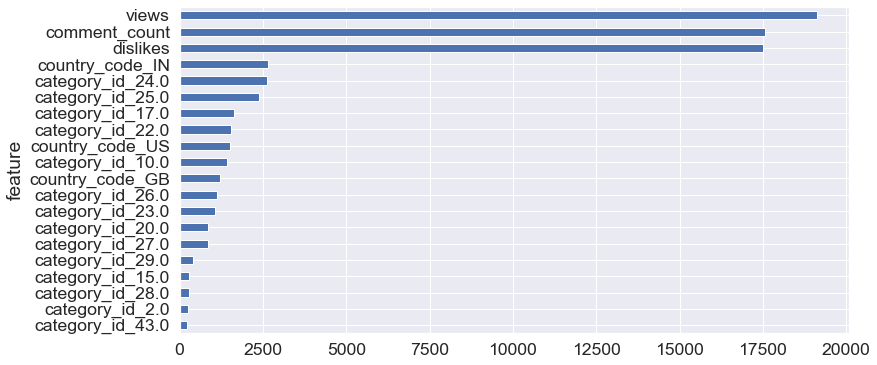

In [108]:
lgbm_hyper = LGBMRegressor(n_estimators = 2500, learning_rate = 0.008, colsample_bytree = 0.75, metric = None)

fit_parameters = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

lgbhyp_oofs, lgbhyp_preds, fi = run_gradient_boosting(lgbm_hyper, fit_parameters, train_set, test_set, cat_num_cols)

In [109]:
strat_lgbmhyp_catnum_test_pred = np.expm1(lgbhyp_preds)

download_preds(strat_lgbmhyp_catnum_test_pred, file_name = 'lgbmhype_catnum_preds.csv')


---------------- Fold1 ----------------------
[0]	validation_0-rmse:7.34696
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.26265
[200]	validation_0-rmse:0.71652
[300]	validation_0-rmse:0.68003
[400]	validation_0-rmse:0.66814
[500]	validation_0-rmse:0.66251
[600]	validation_0-rmse:0.65927
[700]	validation_0-rmse:0.65737
[800]	validation_0-rmse:0.65654
[900]	validation_0-rmse:0.65573
[1000]	validation_0-rmse:0.65557
[1100]	validation_0-rmse:0.65509
[1200]	validation_0-rmse:0.65504
Stopping. Best iteration:
[1128]	validation_0-rmse:0.65497


 av_metric score for validation test is 654.9646561020793

---------------- Fold2 ----------------------
[0]	validation_0-rmse:7.35248
Will train until validation_0-rmse hasn't improved in 100 rounds.
[100]	validation_0-rmse:1.26012
[200]	validation_0-rmse:0.72985
[300]	validation_0-rmse:0.69688
[400]	validation_0-rmse:0.68609
[500]	validation_0-rmse:0.68093
[600]	validation_0-rmse:0.67815
[700]	validation

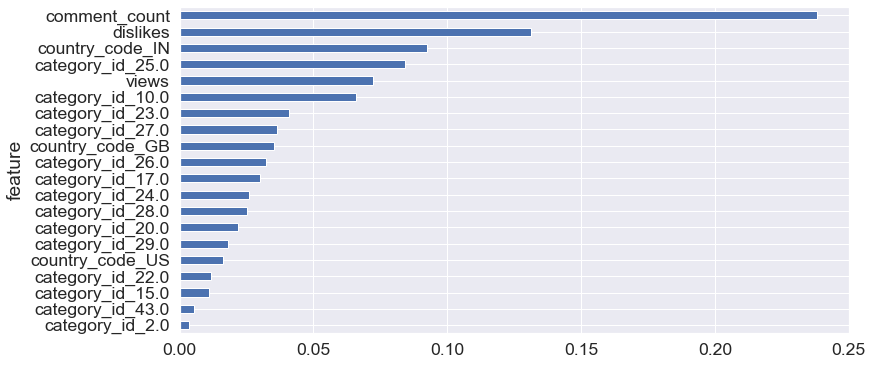

In [110]:
from xgboost import XGBRegressor
xgboost = XGBRegressor(n_estimators = 1250, max_depth = 6, learning_rate = 0.02, colsample_bytree = 0.5, metric = None, 
                      random_state = 42)

fit_parameters = {'verbose': 100, 'early_stopping_rounds': 100, 'eval_metric': 'rmse'}

xgb_oofs, xgb_preds, fi = run_gradient_boosting(xgboost, fit_parameters, train_set, test_set, cat_num_cols)

# Feature Engineering

In [111]:
def join_df(train, test): 
    df = pd.concat([train,test], axis = 0).reset_index(drop = True)
    features = [c for c in df.columns if c not in [Target_col, Id_col]]
    df[num_cols + ['likes']] = df[num_cols + ['likes']].apply(lambda x: np.log1p(x))
    
    return df, features

def split_df_get_features(df, train_nrows): 
    train, test = df[:train_nrows].reset_index(drop = True), df[train_nrows:].reset_index(drop = True)
    features = [c for c in df.columns if c not in [Target_col, Id_col]]
    
    return train, test, features

In [112]:
df, features = join_df(df_train, df_test)

features

['title',
 'channel_title',
 'category_id',
 'publish_date',
 'tags',
 'views',
 'dislikes',
 'comment_count',
 'description',
 'country_code']

In [113]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [114]:
cat_cols = ['country_code', 'category_id', 'channel_title']

In [115]:
df[cat_cols] = df[cat_cols].apply(lambda x: pd.factorize(x)[0])

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   video_id       37231 non-null  int64  
 1   title          37231 non-null  object 
 2   channel_title  37231 non-null  int64  
 3   category_id    37231 non-null  int64  
 4   publish_date   37231 non-null  object 
 5   tags           37231 non-null  object 
 6   views          37231 non-null  float64
 7   dislikes       37231 non-null  float64
 8   comment_count  37231 non-null  float64
 9   description    37231 non-null  object 
 10  country_code   37231 non-null  int64  
 11  likes          26061 non-null  float64
dtypes: float64(4), int64(4), object(4)
memory usage: 3.4+ MB


In [117]:
df['publish_date'] = pd.to_datetime(df['publish_date'], format = "%Y-%m-%d")


In [118]:
df['days_since_the_first_publish_date'] = (df['publish_date'] - min(df['publish_date'])).dt.days

df['publish_date_of_the_week'] = df['publish_date'].dt.dayofweek
df['publish_date_month'] = df['publish_date'].dt.month
df['publish_date_year'] = df['publish_date'].dt.year

In [119]:
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'tags', 'description', 'publish_date']]

In [120]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'days_since_the_first_publish_date',
 'publish_date_of_the_week',
 'publish_date_month',
 'publish_date_year']

In [121]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])


---------------- Fold1 ----------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.663351
[600]	valid_0's rmse: 0.623751
[900]	valid_0's rmse: 0.610034
[1200]	valid_0's rmse: 0.602463
[1500]	valid_0's rmse: 0.597199
[1800]	valid_0's rmse: 0.592999
[2100]	valid_0's rmse: 0.590052
[2400]	valid_0's rmse: 0.587663
[2700]	valid_0's rmse: 0.585435
[3000]	valid_0's rmse: 0.583923
[3300]	valid_0's rmse: 0.582505
[3600]	valid_0's rmse: 0.581534
[3900]	valid_0's rmse: 0.580287
[4200]	valid_0's rmse: 0.579597
[4500]	valid_0's rmse: 0.579421
[4800]	valid_0's rmse: 0.578836
Did not meet early stopping. Best iteration is:
[4981]	valid_0's rmse: 0.578489

 av_metric score for validation test is 578.4885275217695

---------------- Fold2 ----------------------
Training until validation scores don't improve for 200 rounds
[300]	valid_0's rmse: 0.673746
[600]	valid_0's rmse: 0.635835
[900]	valid_0's rmse: 0.621277
[1200]	valid_0's rmse: 0.613976
[1500]	va

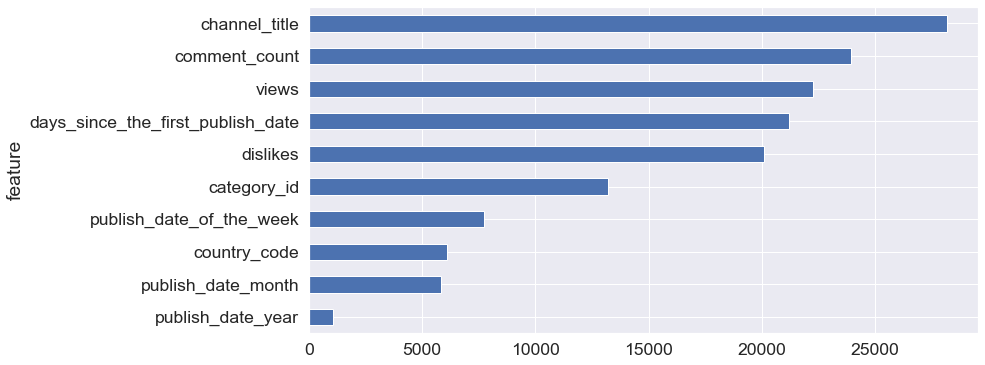

In [122]:
lgb_fea = LGBMRegressor(n_estimators = 5000, learning_rate = 0.02, colsample_bytree = 0.5, metric = None, 
                      random_state = 42)

fit_params = {'verbose': 300, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgb_fea_oofs, lgb_fea_preds, fi = run_gradient_boosting(lgb_fea, fit_params, train_set, test_set, cat_num_cols)

In [123]:
strat_lgb_fea_catnum_test_pred = np.expm1(lgb_fea_preds)

download_preds(strat_lgb_fea_catnum_test_pred, file_name = 'lgb_fea_catnum_preds.csv')

### Mapping a frequency feature to channel title

In [124]:
df.channel_title.value_counts()

116     233
299     180
15      179
92      169
406     152
       ... 
3832      1
5883      1
5551      1
1453      1
4078      1
Name: channel_title, Length: 6979, dtype: int64

In [125]:
df.publish_date.value_counts()

2018-01-29    282
2017-12-13    258
2018-01-19    257
2017-12-20    255
2018-01-12    255
             ... 
2017-10-27      1
2013-10-27      1
2015-03-29      1
2011-02-03      1
2013-03-20      1
Name: publish_date, Length: 399, dtype: int64

In [126]:
max(df.publish_date) - min(df.publish_date)

Timedelta('4344 days 00:00:00')

In [127]:
df['Channel_title_freq'] = df['channel_title'].map(df['channel_title'].value_counts())
df['publish_date_freq'] = df['publish_date'].map(df['publish_date'].value_counts())

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 18 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   video_id                           37231 non-null  int64         
 1   title                              37231 non-null  object        
 2   channel_title                      37231 non-null  int64         
 3   category_id                        37231 non-null  int64         
 4   publish_date                       37231 non-null  datetime64[ns]
 5   tags                               37231 non-null  object        
 6   views                              37231 non-null  float64       
 7   dislikes                           37231 non-null  float64       
 8   comment_count                      37231 non-null  float64       
 9   description                        37231 non-null  object        
 10  country_code                      

In [129]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'description', 'tags', 'publish_date']]


In [130]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'days_since_the_first_publish_date',
 'publish_date_of_the_week',
 'publish_date_month',
 'publish_date_year',
 'Channel_title_freq',
 'publish_date_freq']


---------------- Fold1 ----------------------
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.658974
[200]	valid_0's rmse: 0.612591
[300]	valid_0's rmse: 0.594986
[400]	valid_0's rmse: 0.584412
[500]	valid_0's rmse: 0.577888
[600]	valid_0's rmse: 0.572784
[700]	valid_0's rmse: 0.568096
[800]	valid_0's rmse: 0.565993
[900]	valid_0's rmse: 0.564343
[1000]	valid_0's rmse: 0.56255
[1100]	valid_0's rmse: 0.561528
[1200]	valid_0's rmse: 0.560524
[1300]	valid_0's rmse: 0.558797
[1400]	valid_0's rmse: 0.557707
[1500]	valid_0's rmse: 0.557064
[1600]	valid_0's rmse: 0.556832
[1700]	valid_0's rmse: 0.556282
[1800]	valid_0's rmse: 0.555178
[1900]	valid_0's rmse: 0.554669
[2000]	valid_0's rmse: 0.554335
[2100]	valid_0's rmse: 0.554308
[2200]	valid_0's rmse: 0.5541
[2300]	valid_0's rmse: 0.553601
[2400]	valid_0's rmse: 0.553794
[2500]	valid_0's rmse: 0.553553
[2600]	valid_0's rmse: 0.5531
[2700]	valid_0's rmse: 0.552607
[2800]	valid_0's rmse: 0.552618
[2900]	va

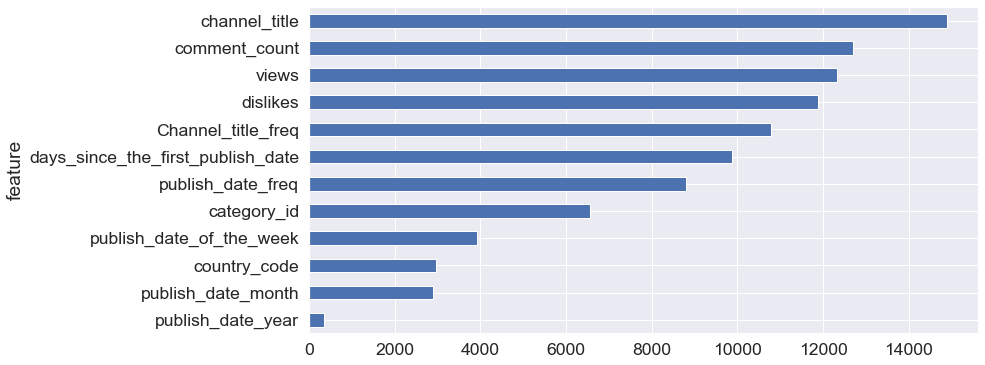

In [131]:
lgbm = LGBMRegressor(n_estimators = 5000, learning_rate = 0.05, colsample_bytree = 0.5, metric = 'None')

fit_params = {'verbose': 100, 'eval_metric': 'rmse', 'early_stopping_rounds': 200}

lgb_oofs, lgb_preds, fi = run_gradient_boosting(lgbm, fit_params, train_set, test_set, cat_num_cols)

In [132]:
lgbm_preds = np.expm1(lgb_preds)

download_preds(lgbm_preds, file_name = 'lgbm_freq_preds.csv')

In [133]:
df['channel_in_n_countries'] = df.groupby("channel_title")['country_code'].transform('nunique')

In [134]:
df.head()

video_id                                              title  channel_title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...              0   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...              1   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...              2   
3     22618       Havana - swing cover | dodie feat. FLASHBACK              3   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...              4   

   category_id publish_date  \
0            0   2017-12-12   
1            0   2018-03-08   
2            0   2018-03-26   
3            1   2018-02-21   
4            2   2018-05-10   

                                                tags   views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  12.770     5.700   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  13.042     4.317   
2  challenging star darshan latest news|"challeng...  10.602     5.017   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  13.142     6.743   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...  11.216     4.248   

   comment_count                                        description  \
0          6.804  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          5.753  Vice Ganda notices Bela Padilla's sudden chang...   
2          4.615  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3          8.420  Hi hi hi! here's our vid on FLASHBACK's channe...   
4          5.088  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   

   country_code   likes  days_since_the_first_publish_date  \
0             0   7.763                               4160   
1             0   8.091                               4246   
2             1   6.365                               4264   
3             2  11.324                               4231   
4             1   8.177                               4309   

   publish_date_of_the_week  publish_date_month  publish_date_year  \
0                         1                  12               2017   
1                         3                   3               2018   
2                         0                   3               2018   
3                         2                   2               2018   
4                         3                   5               2018   

   Channel_title_freq  publish_date_freq  channel_in_n_countries  
0                  94                220                       2  
1                  90                192                       1  
2                  15                185                       1  
3                   2                199                       1  
4                  27                148                       1

In [135]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'description', 'tags', 'publish_date']]


---------------- Fold1 ----------------------
[LightGBM] [Warning] Accuracy may be bad since you didn't set num_leaves and 2^max_depth > num_leaves
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.650102
[200]	valid_0's rmse: 0.613106
[300]	valid_0's rmse: 0.595277
[400]	valid_0's rmse: 0.58507
[500]	valid_0's rmse: 0.577177
[600]	valid_0's rmse: 0.571262
[700]	valid_0's rmse: 0.566835
[800]	valid_0's rmse: 0.563242
[900]	valid_0's rmse: 0.561268
[1000]	valid_0's rmse: 0.558859
[1100]	valid_0's rmse: 0.557018
[1200]	valid_0's rmse: 0.555761
[1300]	valid_0's rmse: 0.554466
[1400]	valid_0's rmse: 0.553275
[1500]	valid_0's rmse: 0.552839
[1600]	valid_0's rmse: 0.55217
[1700]	valid_0's rmse: 0.551244
[1800]	valid_0's rmse: 0.551225
[1900]	valid_0's rmse: 0.550725
[2000]	valid_0's rmse: 0.550343
[2100]	valid_0's rmse: 0.55
[2200]	valid_0's rmse: 0.549343
[2300]	valid_0's rmse: 0.548856
[2400]	valid_0's rmse: 0.548477
[2500]	valid_0's rmse: 0.548291
[260

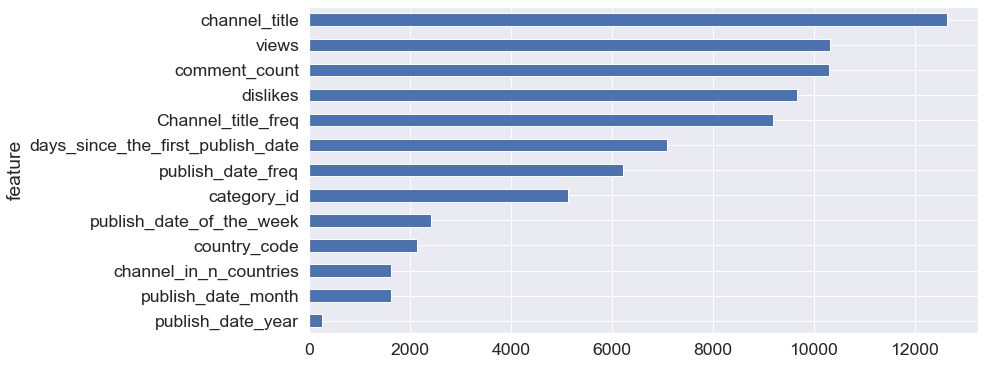

In [136]:
lgbm_2 = LGBMRegressor(n_estimators = 5000, max_depth = 6, colsample_bytree = 0.7, learning_rate = 0.05, metric = 'None')

fit_params = {'verbose': 100, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgbm2_oofs, lgbm2_preds, fi = run_gradient_boosting(lgbm_2, fit_params, train_set, test_set, cat_num_cols)

In [137]:
df['channel_title_mean_views'] = df.groupby(['channel_title'])['views'].transform(np.mean)
df['channel_title_max_views'] = df.groupby(['channel_title'])['views'].transform(np.max)
df['channel_title_min_views'] = df.groupby(['channel_title'])['views'].transform(np.min)

df['channel_title_mean_comments'] = df.groupby(['channel_title'])['comment_count'].mean()
df['channel_title_max_comments'] = df.groupby(['channel_title'])['comment_count'].max()
df['channel_title_min_comments'] = df.groupby(['channel_title'])['comment_count'].min()

df['channel_title_mean_dislikes'] = df.groupby(['channel_title'])['dislikes'].mean()
df['channel_title_max_dislikes'] = df.groupby(['channel_title'])['dislikes'].max()
df['channel_title_min_dislikes'] = df.groupby(['channel_title'])['dislikes'].min()


df.head()

video_id                                              title  channel_title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...              0   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...              1   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...              2   
3     22618       Havana - swing cover | dodie feat. FLASHBACK              3   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...              4   

   category_id publish_date  \
0            0   2017-12-12   
1            0   2018-03-08   
2            0   2018-03-26   
3            1   2018-02-21   
4            2   2018-05-10   

                                                tags   views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  12.770     5.700   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  13.042     4.317   
2  challenging star darshan latest news|"challeng...  10.602     5.017   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  13.142     6.743   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...  11.216     4.248   

   comment_count                                        description  ...  \
0          6.804  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...  ...   
1          5.753  Vice Ganda notices Bela Padilla's sudden chang...  ...   
2          4.615  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...  ...   
3          8.420  Hi hi hi! here's our vid on FLASHBACK's channe...  ...   
4          5.088  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...  ...   

   channel_in_n_countries  channel_title_mean_views  channel_title_max_views  \
0                       2                    12.621                   13.661   
1                       1                    12.455                   14.850   
2                       1                    10.811                   11.603   
3                       1                    12.755                   13.142   
4                       1                    11.157                   11.692   

   channel_title_min_views  channel_title_mean_comments  \
0                   11.461                        6.272   
1                   11.018                        4.974   
2                    9.623                        3.549   
3                   12.369                        8.252   
4                   10.679                        5.671   

   channel_title_max_comments  channel_title_min_comments  \
0                       8.294                       4.477   
1                       8.666                       1.946   
2                       5.684                       2.303   
3                       8.420                       8.083   
4                       6.981                       4.796   

   channel_title_mean_dislikes  channel_title_max_dislikes  \
0                        5.166                       6.486   
1                        4.175                       7.573   
2                        3.935                       5.017   
3                        5.632                       6.743   
4                        5.019                       5.684   

   channel_title_min_dislikes  
0                       3.466  
1                       2.197  
2                       0.693  
3                       4.522  
4                       3.932  

[5 rows x 28 columns]

In [138]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'description', 'tags', 'publish_date']]

In [139]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'days_since_the_first_publish_date',
 'publish_date_of_the_week',
 'publish_date_month',
 'publish_date_year',
 'Channel_title_freq',
 'publish_date_freq',
 'channel_in_n_countries',
 'channel_title_mean_views',
 'channel_title_max_views',
 'channel_title_min_views',
 'channel_title_mean_comments',
 'channel_title_max_comments',
 'channel_title_min_comments',
 'channel_title_mean_dislikes',
 'channel_title_max_dislikes',
 'channel_title_min_dislikes']


---------------- Fold1 ----------------------
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.617918
[200]	valid_0's rmse: 0.583003
[300]	valid_0's rmse: 0.566044
[400]	valid_0's rmse: 0.557255
[500]	valid_0's rmse: 0.549062
[600]	valid_0's rmse: 0.543603
[700]	valid_0's rmse: 0.539329
[800]	valid_0's rmse: 0.535556
[900]	valid_0's rmse: 0.533022
[1000]	valid_0's rmse: 0.531383
[1100]	valid_0's rmse: 0.529272
[1200]	valid_0's rmse: 0.527936
[1300]	valid_0's rmse: 0.526369
[1400]	valid_0's rmse: 0.52526
[1500]	valid_0's rmse: 0.523847
[1600]	valid_0's rmse: 0.523492
[1700]	valid_0's rmse: 0.523015
[1800]	valid_0's rmse: 0.522478
[1900]	valid_0's rmse: 0.521696
[2000]	valid_0's rmse: 0.5213
[2100]	valid_0's rmse: 0.520958
[2200]	valid_0's rmse: 0.520448
[2300]	valid_0's rmse: 0.520198
[2400]	valid_0's rmse: 0.520304
Early stopping, best iteration is:
[2283]	valid_0's rmse: 0.520099

 av_metric score for validation test is 520.0993434984613

--------

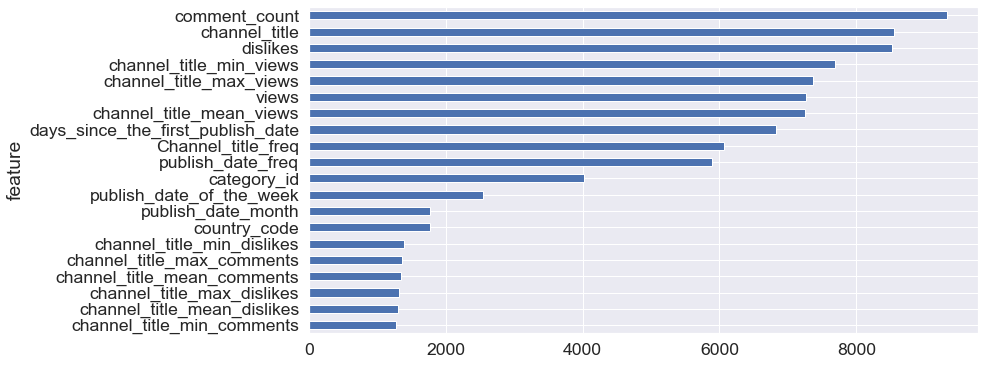

In [140]:
lgbm_3 = LGBMRegressor(n_estimators = 5000, colsample_bytree = 0.7, learning_rate = 0.05, metric = 'None')

fit_params = {'verbose': 100, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgbm3_oofs, lgbm3_preds, fi = run_gradient_boosting(lgbm_3, fit_params, train_set, test_set, cat_num_cols)

In [141]:
lgbm_preds_3 = np.expm1(lgbm3_preds)

download_preds(lgbm_preds_3, file_name = 'lgbm_freq_preds_3.csv')

## Adding the length of text cols as a feature

In [142]:
df['title_length'] = df['title'].apply(lambda x: len(x))
df['description_length'] = df['description'].apply(lambda x: len(x))
df['tags_length'] = df['tags'].apply(lambda x: len(x))


In [143]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'description', 'tags', 'publish_date']]

In [144]:
cat_num_cols

['channel_title',
 'category_id',
 'views',
 'dislikes',
 'comment_count',
 'country_code',
 'days_since_the_first_publish_date',
 'publish_date_of_the_week',
 'publish_date_month',
 'publish_date_year',
 'Channel_title_freq',
 'publish_date_freq',
 'channel_in_n_countries',
 'channel_title_mean_views',
 'channel_title_max_views',
 'channel_title_min_views',
 'channel_title_mean_comments',
 'channel_title_max_comments',
 'channel_title_min_comments',
 'channel_title_mean_dislikes',
 'channel_title_max_dislikes',
 'channel_title_min_dislikes',
 'title_length',
 'description_length',
 'tags_length']


---------------- Fold1 ----------------------
Training until validation scores don't improve for 200 rounds
[100]	valid_0's rmse: 0.614447
[200]	valid_0's rmse: 0.573978
[300]	valid_0's rmse: 0.557612
[400]	valid_0's rmse: 0.547879
[500]	valid_0's rmse: 0.541386
[600]	valid_0's rmse: 0.535672
[700]	valid_0's rmse: 0.532364
[800]	valid_0's rmse: 0.527985
[900]	valid_0's rmse: 0.525353
[1000]	valid_0's rmse: 0.523673
[1100]	valid_0's rmse: 0.522896
[1200]	valid_0's rmse: 0.521463
[1300]	valid_0's rmse: 0.520292
[1400]	valid_0's rmse: 0.519203
[1500]	valid_0's rmse: 0.518251
[1600]	valid_0's rmse: 0.517828
[1700]	valid_0's rmse: 0.517165
[1800]	valid_0's rmse: 0.516509
[1900]	valid_0's rmse: 0.516257
[2000]	valid_0's rmse: 0.51561
[2100]	valid_0's rmse: 0.515115
[2200]	valid_0's rmse: 0.514828
[2300]	valid_0's rmse: 0.514488
[2400]	valid_0's rmse: 0.513932
[2500]	valid_0's rmse: 0.51353
[2600]	valid_0's rmse: 0.512805
[2700]	valid_0's rmse: 0.512528
[2800]	valid_0's rmse: 0.512117
[2900]

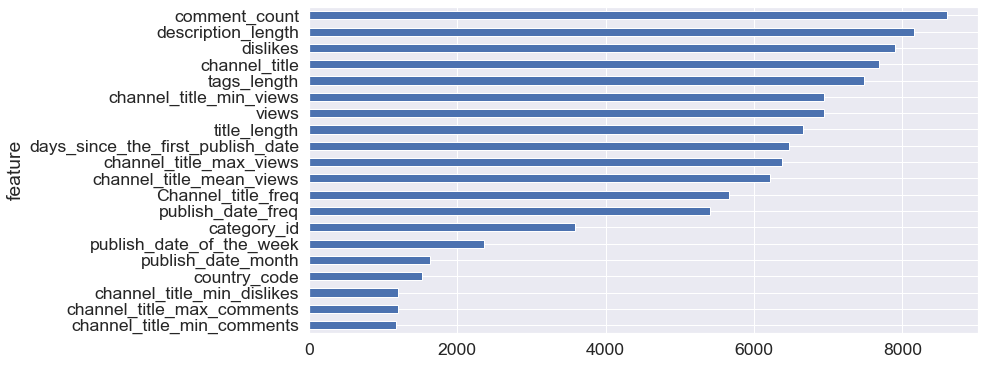

In [145]:
lgbm_4 = LGBMRegressor(n_estimators = 5000, colsample_bytree = 0.7, learning_rate = 0.05, metric = 'None')

fit_params = {'verbose': 100, 'early_stopping_rounds': 200, 'eval_metric': 'rmse'}

lgbm4_oofs, lgbm4_preds, fi = run_gradient_boosting(lgbm_4, fit_params, train_set, test_set, cat_num_cols)

In [146]:
lgbm_preds_4 = np.expm1(lgbm4_preds)

download_preds(lgbm_preds_4, file_name = 'lgbm_freq_preds_4.csv')

## Moving on to the bag of words approach for text cols

In [147]:
from sklearn.feature_extraction.text import CountVectorizer

Top_nwords = 100

vec = CountVectorizer(max_features = Top_nwords)

txt_to_fts = vec.fit_transform(df['description'])
txt_to_fts.shape

(37231, 100)

In [148]:
txt_to_fts

<37231x100 sparse matrix of type '<class 'numpy.int64'>'
	with 853145 stored elements in Compressed Sparse Row format>

In [149]:
df.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes', 'days_since_the_first_publish_date',
       'publish_date_of_the_week', 'publish_date_month', 'publish_date_year',
       'Channel_title_freq', 'publish_date_freq', 'channel_in_n_countries',
       'channel_title_mean_views', 'channel_title_max_views',
       'channel_title_min_views', 'channel_title_mean_comments',
       'channel_title_max_comments', 'channel_title_min_comments',
       'channel_title_mean_dislikes', 'channel_title_max_dislikes',
       'channel_title_min_dislikes', 'title_length', 'description_length',
       'tags_length'],
      dtype='object')

In [150]:
c = 'description'

txt_fts_names = [c + f'_word_{i}_count' for i in range(Top_nwords)]
txt_fts_names

['description_word_0_count',
 'description_word_1_count',
 'description_word_2_count',
 'description_word_3_count',
 'description_word_4_count',
 'description_word_5_count',
 'description_word_6_count',
 'description_word_7_count',
 'description_word_8_count',
 'description_word_9_count',
 'description_word_10_count',
 'description_word_11_count',
 'description_word_12_count',
 'description_word_13_count',
 'description_word_14_count',
 'description_word_15_count',
 'description_word_16_count',
 'description_word_17_count',
 'description_word_18_count',
 'description_word_19_count',
 'description_word_20_count',
 'description_word_21_count',
 'description_word_22_count',
 'description_word_23_count',
 'description_word_24_count',
 'description_word_25_count',
 'description_word_26_count',
 'description_word_27_count',
 'description_word_28_count',
 'description_word_29_count',
 'description_word_30_count',
 'description_word_31_count',
 'description_word_32_count',
 'description_word_3

In [151]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37231 entries, 0 to 37230
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   video_id                           37231 non-null  int64         
 1   title                              37231 non-null  object        
 2   channel_title                      37231 non-null  int64         
 3   category_id                        37231 non-null  int64         
 4   publish_date                       37231 non-null  datetime64[ns]
 5   tags                               37231 non-null  object        
 6   views                              37231 non-null  float64       
 7   dislikes                           37231 non-null  float64       
 8   comment_count                      37231 non-null  float64       
 9   description                        37231 non-null  object        
 10  country_code                      

In [ ]:
cat_num_cols

In [ ]:
train_set, test_set, features = split_df_get_features(df, train_set.shape[0])
features = [c for c in df.columns if c not in [Id_col, Target_col]]
cat_num_cols = [c for c in features if c not in ['title', 'description', 'tags', 'publish_date']]